In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy as stats

from statistics import mean, median

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
# Path to sqlite
database_path = "Resources/hawaiinot8.sqlite"     # Creates the path variable

In [6]:
# Create engine to that can talk to the database hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
#engine     # To view engine contents
conn1 = engine.connect()     # Create a connection
conn1     # Shows connection

In [7]:
# Can I see the station table?
engine.execute('SELECT * FROM station LIMIT 3').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]

In [8]:
# Checking column headings and data types for station table.
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Can I see the measurement table?
engine.execute('SELECT * FROM measurement LIMIT 3').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]

In [10]:
# Checking columns and data types for measurement table.
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
data = engine.execute("SELECT * FROM station LIMIT 3;")     # First table, station listed
for record in data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)


In [12]:
# Create a dataframe for database records
stationloc = pd.read_sql("SELECT * FROM station", conn1)

In [13]:
# Display the dataframe headers and data
stationloc.head(3)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0


In [14]:
# Query all records in the hawaii.sqlite database
data = engine.execute("SELECT * FROM measurement LIMIT 3;")     # Second table, measurement listed
for record in data:     # Shows the data in the table
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)


In [15]:
conn2 = engine.connect()     # Create another table connection
conn2     # Shows second connection address

In [16]:
# Create a dataframe for measurement table records
rainmeasure = pd.read_sql("SELECT * FROM measurement", conn2)

In [17]:
# Display the measurement dataframe headers and data
rainmeasure.head(3)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0


In [18]:
# Declaring the base automatically
base = automap_base()     # Case sensitive

In [19]:
# Use the Base class to reflect the database tables
base.prepare(autoload_with=engine)     # Created engines to use above

In [20]:
# Print all of the classes mapped to the base
base.classes.keys()

['measurement', 'station']

In [21]:
# reflect an existing database into a new model

# reflect the tables


In [22]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [23]:
Measurement = base.classes.measurement     # Case sensitive

In [24]:
Station = base.classes.station

In [25]:
# Save references to each table
# station is common to both tables

# Use a DataFrame?


In [26]:
combined_data = pd.merge(rainmeasure, stationloc, on="station", how="inner")
combined_data.head(3)

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Query all of the dates - will this work? Case sensitive.
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [29]:
# Earliest date query.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [30]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

session.query(Measurement.date).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()

[('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09

In [32]:
# Perform a query to retrieve the data and precipitation scores
query_rain = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Rain date query start: ", query_rain)

Rain date query start:  2016-08-23


In [33]:
#session.query(Measurement.date, Measurement.prcp).filter(Measurement.date == query_rain).all()

In [34]:
session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [95]:
yearly_rainfall = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
yearly_rainfall

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [36]:
# Save the query results as a Pandas DataFrame and set the index to the date
# column.

yearly_rainfall_df = pd.DataFrame(yearly_rainfall)
yearly_rainfall_df.head(3)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28


In [37]:
# Setting the date column as the index of the DataFrame.
yearly_rainfall_df = pd.DataFrame(yearly_rainfall, columns=['data','prcp'])
yearly_rainfall_df.set_index('data', inplace=True)     # Not unique?
yearly_rainfall_df.head(3)

,prcp
data,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [38]:
# Sort the DataFrame values by "date".     # data already appears to be sorted by date???
yearly_rainfall_df.sort_values(by='data',ascending=True)   # data looks same as before
yearly_rainfall_df.head()

,prcp
data,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<function matplotlib.pyplot.show(close=None, block=None)>

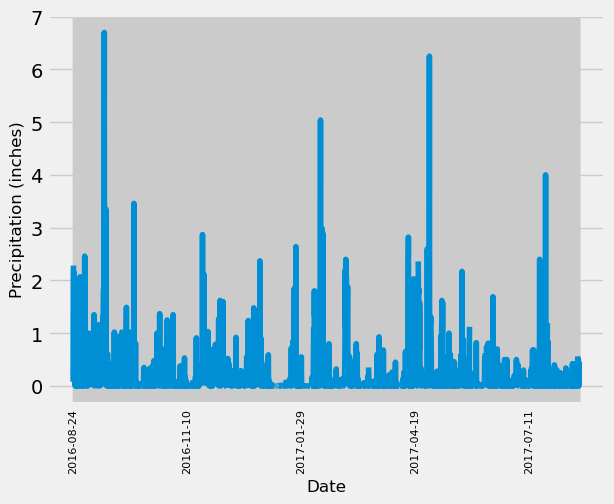

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data

x_axis = np.arange(len(yearly_rainfall_df))
tick_locations = [value for value in x_axis]

#plt.bar(x_axis, df["prcp"])     # Doesn't match lesson graph (very thin lines)

yearly_rainfall_df.plot(legend=False)
plt.xticks(tick_locations, fontsize=8, rotation=90)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Precipitation (inches)", fontsize=12)
plt.savefig("Hawaii_Rain.png")     # Blank (white) image if done after plt.show. Change dimensions.
plt.show

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
yearly_rainfall_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [93]:
precipitation = yearly_rainfall_df['prcp']
mean_numpy = np.mean(precipitation)
print(f"The average rainfall for time period is {mean_numpy} inches.")

The average rainfall for time period is 0.1764615384615378 inches.


In [42]:
#print(float(mean_numpy))

In [119]:
#median_numpy = np.median(precipitation)     # This doesn't work, NA? Sorted already?
#print(f"The median rainfall in Hawaii for the time period is {median_numpy} inches.")

In [44]:
#mode_scipy = st.mode(precipitation)     # SciPy (st) mode didn't work?
#print(f"The mode rainfall in Hawii for the time period is {mode_scipy} inches.")

In [49]:
var_numpy = np.var(precipitation,ddof = 0)
print(f"The rainfall variance using the NumPy module is {var_numpy}.")

The rainfall variance using the NumPy module is 0.21176023363236776.


In [50]:
sd_numpy = np.std(precipitation,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}.")

The population standard deviation using the NumPy module is 0.46017413403228974.


In [51]:
# Need variables converted from text string (from printing statements above) back to float values.
# Need a bottom limit as zero should be the bottom, lowest value. No negative values.

print(f"Roughly 68% of the data is between {round(float(mean_numpy-sd_numpy),3)} and {round(float(mean_numpy+sd_numpy),3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between -0.284 and 0.637
Roughly 95% of the data is between -0.744 and 1.097
Roughly 99.7% of the data is between -1.204 and 1.557


# Exploratory Station Analysis

In [53]:
# Design a query to calculate the total number stations in the dataset
# use count

session.query(func.count(Station.station)).all()

[(9,)]

In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# use count and desc

sel = [Measurement.station,
      func.count(Measurement.station)]
station_readings = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(Measurement.station.desc()).all()
station_readings

# Use first() for most active after sorting descending order?

#station_query = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).all()
#station_query

# USC00519281 has 2772 readings.

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [55]:
# Using the most active station id from the previous query, calculate the
# lowest, highest, and average temperature.
# descriptive?

Station_281_temps = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').all()
Station_281_temps



[('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 76.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 70.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 68.0),
 ('USC00519281', 64.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 70.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 69.0),
 ('USC00519281', 60.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 65.0),
 ('USC00519281', 75.0),
 ('USC00519281', 69.0),
 ('USC00519281', 67.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 67.0),
 ('USC00519281', 65.0),
 ('USC00519281', 64.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 68.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 61.0),
 ('USC00519281',

In [86]:
#temps = [Station_281_temps,     # Not working?
        #func.avg(Measurement.tobs),
        #func.min(Measurement.tobs),
        #func.max(Measurement.tobs)]

#temps

In [122]:
# Average temperature for Station USC00519281.
# There are null readings for some rows. Will row count be accurate or strip null rows first?

#ave_281_temp = np.mean(Station_281_temps)[1]
#ave_281_temp

In [67]:
# Minimum temperature for Station USC00519281.
min_281_temp = min(Station_281_temps)
min_281_temp

('USC00519281', 54.0)

In [68]:
# Maximum temperature for Station USC00519281.
max_281_temp = max(Station_281_temps)
max_281_temp

('USC00519281', 85.0)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [100]:
# From above
rainmeasure.head(3)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0


In [130]:
yearly_data = session.query(Measurement.date,
    Measurement.station, Measurement.tobs).\
        filter[(Measurement.date > '2016-08-23') AND (Measurement.station == 'USC00519281')]
yearly_data

SyntaxError: invalid syntax (3539224028.py, line 3)

In [123]:
station_281_temps = session.query(yearly_data,
    Measurement.station, Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').all()
station_281_temps

ArgumentError: Column expression or FROM clause expected, got [('2016-08-24', 'USC00519397', 0.08), ('2016-08-25', 'USC00519397', 0.08), ('2016-08-26', 'USC00519397', 0.0), ('2016-08-27', 'USC00519397', 0.0), ('2016-08-28', 'USC00519397', 0.01), ('2016-08-29', 'USC00519397', 0.0), ('2016-08-30', 'USC00519397', 0.0), ('2016-08-31', 'USC00519397', 0.13), ('2016-09-01', 'USC00519397', 0.0), ('2016-09-02', 'USC00519397', 0.0), ('2016-09-03', 'USC00519397', 0.0), ('2016-09-04', 'USC00519397', 0.03), ('2016-09-05', 'USC00519397', None), ('2016-09-06', 'USC00519397', None), ('2016-09-07', 'USC00519397', 0.05), ('2016-09-08', 'USC00519397', 0.0), ('2016-09-09', 'USC00519397', 0.03), ('2016-09-10', 'USC00519397', 0.0), ('2016-09-11', 'USC00519397', 0.05), ('2016-09-12', 'USC00519397', 0.0), ('2016-09-13', 'USC00519397', 0.02), ('2016-09-14', 'USC00519397', 1.32), ('2016-09-15', 'USC00519397', 0.42), ('2016-09-16', 'USC00519397', 0.06), ('2016-09-17', 'USC00519397', 0.05), ('2016-09-18', 'USC00519397', 0.0), ('2016-09-19', 'USC00519397', 0.0), ('2016-09-20', 'USC00519397', 0.0), ('2016-09-21', 'USC00519397', 0.0), ('2016-09-22', 'USC00519397', 0.02), ('2016-09-23', 'USC00519397', 0.0), ('2016-09-24', 'USC00519397', 0.0), ('2016-09-25', 'USC00519397', 0.0), ('2016-09-26', 'USC00519397', 0.06), ('2016-09-27', 'USC00519397', 0.02), ('2016-09-28', 'USC00519397', 0.0), ('2016-09-29', 'USC00519397', 0.0), ('2016-09-30', 'USC00519397', 0.0), ('2016-10-01', 'USC00519397', 0.0), ('2016-10-02', 'USC00519397', 0.0), ('2016-10-03', 'USC00519397', 0.0), ('2016-10-04', 'USC00519397', 0.0), ('2016-10-05', 'USC00519397', 0.0), ('2016-10-06', 'USC00519397', 0.0), ('2016-10-07', 'USC00519397', 0.0), ('2016-10-08', 'USC00519397', 0.0), ('2016-10-09', 'USC00519397', 0.0), ('2016-10-10', 'USC00519397', 0.0), ('2016-10-11', 'USC00519397', 0.0), ('2016-10-12', 'USC00519397', 0.0), ('2016-10-13', 'USC00519397', 0.0), ('2016-10-14', 'USC00519397', 0.0), ('2016-10-15', 'USC00519397', 0.0), ('2016-10-16', 'USC00519397', 0.0), ('2016-10-17', 'USC00519397', 0.01), ('2016-10-18', 'USC00519397', 0.0), ('2016-10-19', 'USC00519397', 0.0), ('2016-10-20', 'USC00519397', 0.0), ('2016-10-21', 'USC00519397', 0.05), ('2016-10-22', 'USC00519397', 0.15), ('2016-10-23', 'USC00519397', 0.01), ('2016-10-24', 'USC00519397', 0.0), ('2016-10-25', 'USC00519397', 0.03), ('2016-10-26', 'USC00519397', 0.0), ('2016-10-27', 'USC00519397', 0.0), ('2016-10-28', 'USC00519397', 0.0), ('2016-10-29', 'USC00519397', 0.0), ('2016-10-30', 'USC00519397', 0.24), ('2016-10-31', 'USC00519397', 0.03), ('2016-11-01', 'USC00519397', 0.0), ('2016-11-02', 'USC00519397', 0.0), ('2016-11-03', 'USC00519397', 0.0), ('2016-11-04', 'USC00519397', 0.0), ('2016-11-05', 'USC00519397', 0.0), ('2016-11-06', 'USC00519397', 0.0), ('2016-11-07', 'USC00519397', 0.0), ('2016-11-08', 'USC00519397', 0.07), ('2016-11-09', 'USC00519397', 0.0), ('2016-11-10', 'USC00519397', 0.0), ('2016-11-11', 'USC00519397', 0.0), ('2016-11-12', 'USC00519397', 0.0), ('2016-11-13', 'USC00519397', 0.0), ('2016-11-14', 'USC00519397', 0.0), ('2016-11-15', 'USC00519397', 0.0), ('2016-11-16', 'USC00519397', 0.0), ('2016-11-17', 'USC00519397', 0.0), ('2016-11-18', 'USC00519397', 0.0), ('2016-11-19', 'USC00519397', 0.03), ('2016-11-20', 'USC00519397', 0.05), ('2016-11-21', 'USC00519397', 0.01), ('2016-11-22', 'USC00519397', 0.13), ('2016-11-23', 'USC00519397', 0.14), ('2016-11-24', 'USC00519397', 0.05), ('2016-11-25', 'USC00519397', 0.05), ('2016-11-26', 'USC00519397', 0.05), ('2016-11-27', 'USC00519397', 0.0), ('2016-11-28', 'USC00519397', 0.01), ('2016-11-29', 'USC00519397', 0.0), ('2016-11-30', 'USC00519397', 0.14), ('2016-12-01', 'USC00519397', 0.12), ('2016-12-02', 'USC00519397', 0.03), ('2016-12-03', 'USC00519397', 0.0), ('2016-12-04', 'USC00519397', 0.03), ('2016-12-05', 'USC00519397', 0.43), ('2016-12-06', 'USC00519397', 0.02), ('2016-12-07', 'USC00519397', 0.0), ('2016-12-08', 'USC00519397', 0.03), ('2016-12-09', 'USC00519397', 0.52), ('2016-12-10', 'USC00519397', 0.05), ('2016-12-11', 'USC00519397', 0.04), ('2016-12-12', 'USC00519397', 0.01), ('2016-12-13', 'USC00519397', 0.05), ('2016-12-14', 'USC00519397', 0.03), ('2016-12-15', 'USC00519397', 0.0), ('2016-12-16', 'USC00519397', 0.0), ('2016-12-17', 'USC00519397', 0.01), ('2016-12-18', 'USC00519397', 0.13), ('2016-12-19', 'USC00519397', 0.01), ('2016-12-20', 'USC00519397', 0.0), ('2016-12-21', 'USC00519397', 0.0), ('2016-12-22', 'USC00519397', 0.01), ('2016-12-23', 'USC00519397', 0.01), ('2016-12-24', 'USC00519397', 0.01), ('2016-12-25', 'USC00519397', 0.0), ('2016-12-26', 'USC00519397', 0.02), ('2016-12-27', 'USC00519397', 0.0), ('2016-12-28', 'USC00519397', 0.02), ('2016-12-29', 'USC00519397', 0.04), ('2016-12-30', 'USC00519397', 0.12), ('2016-12-31', 'USC00519397', 0.01), ('2017-01-01', 'USC00519397', 0.0), ('2017-01-02', 'USC00519397', 0.0), ('2017-01-03', 'USC00519397', 0.0), ('2017-01-04', 'USC00519397', 0.0), ('2017-01-05', 'USC00519397', 0.0), ('2017-01-06', 'USC00519397', 0.0), ('2017-01-07', 'USC00519397', 0.0), ('2017-01-08', 'USC00519397', 0.0), ('2017-01-09', 'USC00519397', 0.0), ('2017-01-10', 'USC00519397', 0.0), ('2017-01-11', 'USC00519397', 0.0), ('2017-01-12', 'USC00519397', 0.0), ('2017-01-13', 'USC00519397', 0.0), ('2017-01-14', 'USC00519397', 0.0), ('2017-01-15', 'USC00519397', 0.0), ('2017-01-16', 'USC00519397', 0.0), ('2017-01-17', 'USC00519397', 0.0), ('2017-01-18', 'USC00519397', 0.0), ('2017-01-19', 'USC00519397', 0.0), ('2017-01-20', 'USC00519397', 0.0), ('2017-01-21', 'USC00519397', 0.0), ('2017-01-22', 'USC00519397', 0.16), ('2017-01-23', 'USC00519397', 0.0), ('2017-01-24', 'USC00519397', 0.04), ('2017-01-25', 'USC00519397', 0.03), ('2017-01-26', 'USC00519397', 0.0), ('2017-01-27', 'USC00519397', 0.0), ('2017-01-28', 'USC00519397', 0.0), ('2017-01-29', 'USC00519397', 0.18), ('2017-01-30', 'USC00519397', 0.0), ('2017-01-31', 'USC00519397', 0.0), ('2017-02-01', 'USC00519397', 0.0), ('2017-02-02', 'USC00519397', 0.0), ('2017-02-03', 'USC00519397', 0.0), ('2017-02-04', 'USC00519397', 0.0), ('2017-02-05', 'USC00519397', 0.0), ('2017-02-06', 'USC00519397', 0.0), ('2017-02-07', 'USC00519397', 0.51), ('2017-02-08', 'USC00519397', 0.0), ('2017-02-09', 'USC00519397', 0.0), ('2017-02-10', 'USC00519397', 0.0), ('2017-02-11', 'USC00519397', 0.31), ('2017-02-12', 'USC00519397', 2.62), ('2017-02-13', 'USC00519397', 0.01), ('2017-02-14', 'USC00519397', 0.0), ('2017-02-15', 'USC00519397', 0.0), ('2017-02-16', 'USC00519397', 0.07), ('2017-02-17', 'USC00519397', 0.0), ('2017-02-18', 'USC00519397', 0.0), ('2017-02-19', 'USC00519397', 0.0), ('2017-02-20', 'USC00519397', 0.0), ('2017-02-21', 'USC00519397', 0.06), ('2017-02-22', 'USC00519397', 0.06), ('2017-02-23', 'USC00519397', 0.01), ('2017-02-24', 'USC00519397', 0.0), ('2017-02-25', 'USC00519397', 0.03), ('2017-02-26', 'USC00519397', 0.0), ('2017-02-27', 'USC00519397', 0.0), ('2017-02-28', 'USC00519397', 0.0), ('2017-03-01', 'USC00519397', 1.19), ('2017-03-02', 'USC00519397', 0.73), ('2017-03-03', 'USC00519397', 0.47), ('2017-03-04', 'USC00519397', 0.0), ('2017-03-05', 'USC00519397', 0.35), ('2017-03-06', 'USC00519397', 0.0), ('2017-03-07', 'USC00519397', 0.0), ('2017-03-08', 'USC00519397', 0.0), ('2017-03-09', 'USC00519397', 0.0), ('2017-03-10', 'USC00519397', 0.0), ('2017-03-11', 'USC00519397', 0.0), ('2017-03-12', 'USC00519397', 0.0), ('2017-03-13', 'USC00519397', 0.0), ('2017-03-14', 'USC00519397', 0.0), ('2017-03-15', 'USC00519397', 0.0), ('2017-03-16', 'USC00519397', 0.0), ('2017-03-17', 'USC00519397', 0.0), ('2017-03-18', 'USC00519397', 0.0), ('2017-03-19', 'USC00519397', 0.0), ('2017-03-20', 'USC00519397', 0.0), ('2017-03-21', 'USC00519397', 0.0), ('2017-03-22', 'USC00519397', 0.0), ('2017-03-23', 'USC00519397', 0.0), ('2017-03-24', 'USC00519397', 0.02), ('2017-03-25', 'USC00519397', 0.0), ('2017-03-26', 'USC00519397', 0.0), ('2017-03-27', 'USC00519397', 0.0), ('2017-03-28', 'USC00519397', 0.0), ('2017-03-29', 'USC00519397', 0.0), ('2017-03-30', 'USC00519397', 0.0), ('2017-03-31', 'USC00519397', 0.0), ('2017-04-01', 'USC00519397', 0.0), ('2017-04-02', 'USC00519397', 0.0), ('2017-04-03', 'USC00519397', 0.0), ('2017-04-04', 'USC00519397', 0.0), ('2017-04-05', 'USC00519397', 0.0), ('2017-04-06', 'USC00519397', 0.0), ('2017-04-07', 'USC00519397', 0.0), ('2017-04-08', 'USC00519397', 0.0), ('2017-04-09', 'USC00519397', 0.0), ('2017-04-10', 'USC00519397', 0.0), ('2017-04-11', 'USC00519397', 0.0), ('2017-04-12', 'USC00519397', 0.0), ('2017-04-13', 'USC00519397', 0.0), ('2017-04-14', 'USC00519397', 0.26), ('2017-04-15', 'USC00519397', 0.01), ('2017-04-16', 'USC00519397', 0.0), ('2017-04-17', 'USC00519397', 0.02), ('2017-04-18', 'USC00519397', 0.0), ('2017-04-19', 'USC00519397', 0.02), ('2017-04-20', 'USC00519397', 0.05), ('2017-04-21', 'USC00519397', 0.23), ('2017-04-22', 'USC00519397', 0.32), ('2017-04-23', 'USC00519397', 0.03), ('2017-04-24', 'USC00519397', 0.0), ('2017-04-25', 'USC00519397', 0.0), ('2017-04-26', 'USC00519397', 0.0), ('2017-04-27', 'USC00519397', 0.0), ('2017-04-28', 'USC00519397', 0.0), ('2017-04-29', 'USC00519397', 0.12), ('2017-04-30', 'USC00519397', 0.89), ('2017-05-01', 'USC00519397', 0.26), ('2017-05-02', 'USC00519397', 0.0), ('2017-05-03', 'USC00519397', 0.0), ('2017-05-04', 'USC00519397', 0.0), ('2017-05-05', 'USC00519397', 0.0), ('2017-05-06', 'USC00519397', 0.0), ('2017-05-07', 'USC00519397', 0.0), ('2017-05-08', 'USC00519397', 0.0), ('2017-05-10', 'USC00519397', 0.0), ('2017-05-11', 'USC00519397', 0.01), ('2017-05-12', 'USC00519397', 0.0), ('2017-05-13', 'USC00519397', 0.0), ('2017-05-14', 'USC00519397', 0.0), ('2017-05-15', 'USC00519397', 0.05), ('2017-05-16', 'USC00519397', 0.01), ('2017-05-17', 'USC00519397', 0.0), ('2017-05-18', 'USC00519397', 0.01), ('2017-05-19', 'USC00519397', 0.0), ('2017-05-20', 'USC00519397', 0.0), ('2017-05-21', 'USC00519397', 0.0), ('2017-05-22', 'USC00519397', 0.0), ('2017-05-23', 'USC00519397', 0.08), ('2017-05-24', 'USC00519397', 0.13), ('2017-05-25', 'USC00519397', 0.15), ('2017-05-27', 'USC00519397', 0.01), ('2017-05-28', 'USC00519397', 0.02), ('2017-05-29', 'USC00519397', 0.0), ('2017-05-30', 'USC00519397', 0.26), ('2017-05-31', 'USC00519397', 0.02), ('2017-06-01', 'USC00519397', 0.0), ('2017-06-02', 'USC00519397', 0.0), ('2017-06-03', 'USC00519397', 0.02), ('2017-06-04', 'USC00519397', 0.0), ('2017-06-05', 'USC00519397', 0.0), ('2017-06-06', 'USC00519397', 0.0), ('2017-06-07', 'USC00519397', 0.0), ('2017-06-08', 'USC00519397', 0.0), ('2017-06-09', 'USC00519397', 0.0), ('2017-06-10', 'USC00519397', 0.04), ('2017-06-11', 'USC00519397', 0.08), ('2017-06-12', 'USC00519397', 0.02), ('2017-06-13', 'USC00519397', 0.0), ('2017-06-14', 'USC00519397', 0.0), ('2017-06-15', 'USC00519397', 0.0), ('2017-06-16', 'USC00519397', 0.0), ('2017-06-17', 'USC00519397', 0.0), ('2017-06-18', 'USC00519397', 0.05), ('2017-06-19', 'USC00519397', 0.0), ('2017-06-20', 'USC00519397', 0.02), ('2017-06-21', 'USC00519397', 0.0), ('2017-06-22', 'USC00519397', 0.0), ('2017-06-23', 'USC00519397', 0.0), ('2017-06-24', 'USC00519397', 0.06), ('2017-06-25', 'USC00519397', 0.0), ('2017-06-26', 'USC00519397', 0.0), ('2017-06-27', 'USC00519397', 0.0), ('2017-06-28', 'USC00519397', 0.0), ('2017-06-29', 'USC00519397', 0.0), ('2017-06-30', 'USC00519397', 0.08), ('2017-07-01', 'USC00519397', 0.02), ('2017-07-02', 'USC00519397', 0.02), ('2017-07-03', 'USC00519397', 0.04), ('2017-07-04', 'USC00519397', 0.04), ('2017-07-05', 'USC00519397', 0.0), ('2017-07-06', 'USC00519397', 0.0), ('2017-07-07', 'USC00519397', 0.0), ('2017-07-08', 'USC00519397', 0.0), ('2017-07-09', 'USC00519397', 0.0), ('2017-07-10', 'USC00519397', 0.0), ('2017-07-11', 'USC00519397', 0.0), ('2017-07-12', 'USC00519397', 0.0), ('2017-07-13', 'USC00519397', 0.07), ('2017-07-14', 'USC00519397', 0.02), ('2017-07-15', 'USC00519397', 0.0), ('2017-07-16', 'USC00519397', 0.02), ('2017-07-17', 'USC00519397', 0.03), ('2017-07-18', 'USC00519397', 0.05), ('2017-07-20', 'USC00519397', 0.03), ('2017-07-21', 'USC00519397', 0.0), ('2017-07-22', 'USC00519397', 0.03), ('2017-07-23', 'USC00519397', 0.0), ('2017-07-24', 'USC00519397', 0.05), ('2017-07-25', 'USC00519397', 0.0), ('2017-07-26', 'USC00519397', 0.0), ('2017-07-27', 'USC00519397', 0.0), ('2017-07-28', 'USC00519397', 0.0), ('2017-07-29', 'USC00519397', 0.0), ('2017-07-30', 'USC00519397', 0.0), ('2017-07-31', 'USC00519397', 0.0), ('2017-08-01', 'USC00519397', 0.02), ('2017-08-02', 'USC00519397', 0.0), ('2017-08-03', 'USC00519397', 0.0), ('2017-08-04', 'USC00519397', 0.02), ('2017-08-05', 'USC00519397', 0.0), ('2017-08-06', 'USC00519397', 0.0), ('2017-08-07', 'USC00519397', 0.0), ('2017-08-08', 'USC00519397', 0.0), ('2017-08-09', 'USC00519397', 0.0), ('2017-08-10', 'USC00519397', 0.0), ('2017-08-11', 'USC00519397', 0.0), ('2017-08-12', 'USC00519397', 0.0), ('2017-08-13', 'USC00519397', 0.0), ('2017-08-14', 'USC00519397', 0.0), ('2017-08-15', 'USC00519397', 0.02), ('2017-08-18', 'USC00519397', 0.0), ('2017-08-19', 'USC00519397', 0.0), ('2017-08-20', 'USC00519397', 0.0), ('2017-08-21', 'USC00519397', 0.0), ('2017-08-22', 'USC00519397', 0.0), ('2017-08-23', 'USC00519397', 0.0), ('2016-08-24', 'USC00513117', 2.15), ('2016-08-25', 'USC00513117', 0.08), ('2016-08-26', 'USC00513117', 0.03), ('2016-08-27', 'USC00513117', 0.18), ('2016-08-28', 'USC00513117', 0.14), ('2016-08-29', 'USC00513117', 0.17), ('2016-08-30', 'USC00513117', 0.0), ('2016-08-31', 'USC00513117', 0.1), ('2016-09-01', 'USC00513117', 0.0), ('2016-09-02', 'USC00513117', 0.02), ('2016-09-03', 'USC00513117', 0.07), ('2016-09-04', 'USC00513117', 0.03), ('2016-09-05', 'USC00513117', 0.11), ('2016-09-06', 'USC00513117', 0.05), ('2016-09-07', 'USC00513117', 0.1), ('2016-09-08', 'USC00513117', 0.22), ('2016-09-09', 'USC00513117', 0.01), ('2016-09-10', 'USC00513117', 0.01), ('2016-09-11', 'USC00513117', 0.18), ('2016-09-12', 'USC00513117', 0.04), ('2016-09-13', 'USC00513117', 0.37), ('2016-09-14', 'USC00513117', 0.9), ('2016-09-15', 'USC00513117', 0.12), ('2016-09-16', 'USC00513117', 0.01), ('2016-09-17', 'USC00513117', 0.04), ('2016-09-18', 'USC00513117', 0.0), ('2016-09-19', 'USC00513117', 0.01), ('2016-09-20', 'USC00513117', 0.09), ('2016-09-21', 'USC00513117', 0.06), ('2016-09-22', 'USC00513117', 0.09), ('2016-09-23', 'USC00513117', 0.15), ('2016-09-24', 'USC00513117', 0.0), ('2016-09-25', 'USC00513117', 0.02), ('2016-09-26', 'USC00513117', 0.06), ('2016-09-27', 'USC00513117', 0.12), ('2016-09-28', 'USC00513117', 0.08), ('2016-09-29', 'USC00513117', 0.49), ('2016-09-30', 'USC00513117', 0.31), ('2016-10-01', 'USC00513117', 0.14), ('2016-10-02', 'USC00513117', 0.02), ('2016-10-03', 'USC00513117', 0.04), ('2016-10-04', 'USC00513117', 0.0), ('2016-10-05', 'USC00513117', 0.0), ('2016-10-06', 'USC00513117', 0.05), ('2016-10-07', 'USC00513117', 0.0), ('2016-10-08', 'USC00513117', 0.0), ('2016-10-09', 'USC00513117', 0.0), ('2016-10-10', 'USC00513117', 0.0), ('2016-10-11', 'USC00513117', 0.02), ('2016-10-12', 'USC00513117', 0.03), ('2016-10-13', 'USC00513117', 0.0), ('2016-10-14', 'USC00513117', 0.0), ('2016-10-15', 'USC00513117', 0.0), ('2016-10-16', 'USC00513117', 0.0), ('2016-10-17', 'USC00513117', 0.03), ('2016-10-18', 'USC00513117', 0.05), ('2016-10-19', 'USC00513117', 0.06), ('2016-10-20', 'USC00513117', 0.0), ('2016-10-21', 'USC00513117', 0.15), ('2016-10-22', 'USC00513117', 0.1), ('2016-10-23', 'USC00513117', 0.01), ('2016-10-24', 'USC00513117', 0.0), ('2016-10-25', 'USC00513117', 0.04), ('2016-10-26', 'USC00513117', 0.06), ('2016-10-27', 'USC00513117', 0.11), ('2016-10-28', 'USC00513117', 0.02), ('2016-10-29', 'USC00513117', 0.02), ('2016-10-30', 'USC00513117', 0.1), ('2016-10-31', 'USC00513117', 0.03), ('2016-11-01', 'USC00513117', 0.01), ('2016-11-02', 'USC00513117', 0.0), ('2016-11-03', 'USC00513117', 0.0), ('2016-11-04', 'USC00513117', 0.0), ('2016-11-05', 'USC00513117', 0.02), ('2016-11-06', 'USC00513117', 0.02), ('2016-11-07', 'USC00513117', 0.0), ('2016-11-08', 'USC00513117', 0.14), ('2016-11-09', 'USC00513117', 0.08), ('2016-11-10', 'USC00513117', 0.0), ('2016-11-11', 'USC00513117', 0.0), ('2016-11-12', 'USC00513117', 0.0), ('2016-11-13', 'USC00513117', 0.0), ('2016-11-14', 'USC00513117', 0.06), ('2016-11-15', 'USC00513117', 0.0), ('2016-11-16', 'USC00513117', 0.14), ('2016-11-17', 'USC00513117', 0.03), ('2016-11-18', 'USC00513117', 0.01), ('2016-11-19', 'USC00513117', 0.11), ('2016-11-20', 'USC00513117', 0.11), ('2016-11-21', 'USC00513117', 0.02), ('2016-11-22', 'USC00513117', 0.41), ('2016-11-23', 'USC00513117', 0.03), ('2016-11-24', 'USC00513117', 0.2), ('2016-11-25', 'USC00513117', 0.05), ('2016-11-26', 'USC00513117', 0.05), ('2016-11-27', 'USC00513117', 0.06), ('2016-11-28', 'USC00513117', 0.02), ('2016-11-29', 'USC00513117', 0.04), ('2016-11-30', 'USC00513117', 0.05), ('2016-12-01', 'USC00513117', 0.33), ('2016-12-02', 'USC00513117', 0.3), ('2016-12-03', 'USC00513117', 0.04), ('2016-12-04', 'USC00513117', 0.1), ('2016-12-05', 'USC00513117', 0.34), ('2016-12-06', 'USC00513117', 0.02), ('2016-12-07', 'USC00513117', 0.17), ('2016-12-08', 'USC00513117', 0.03), ('2016-12-09', 'USC00513117', 0.34), ('2016-12-10', 'USC00513117', 0.02), ('2016-12-11', 'USC00513117', 0.02), ('2016-12-12', 'USC00513117', 0.01), ('2016-12-13', 'USC00513117', 0.1), ('2016-12-14', 'USC00513117', 0.05), ('2016-12-15', 'USC00513117', 0.02), ('2016-12-16', 'USC00513117', 0.01), ('2016-12-17', 'USC00513117', 0.11), ('2016-12-18', 'USC00513117', 0.29), ('2016-12-19', 'USC00513117', 0.21), ('2016-12-20', 'USC00513117', 0.02), ('2016-12-21', 'USC00513117', 0.03), ('2016-12-22', 'USC00513117', 0.17), ('2016-12-23', 'USC00513117', 0.1), ('2016-12-24', 'USC00513117', 0.14), ('2016-12-25', 'USC00513117', 0.03), ('2016-12-26', 'USC00513117', 0.26), ('2016-12-27', 'USC00513117', 0.03), ('2016-12-28', 'USC00513117', 0.09), ('2016-12-29', 'USC00513117', 0.18), ('2016-12-30', 'USC00513117', 0.21), ('2016-12-31', 'USC00513117', 0.62), ('2017-01-01', 'USC00513117', 0.29), ('2017-01-02', 'USC00513117', 0.0), ('2017-01-03', 'USC00513117', 0.0), ('2017-01-04', 'USC00513117', 0.0), ('2017-01-05', 'USC00513117', 0.0), ('2017-01-06', 'USC00513117', 0.0), ('2017-01-07', 'USC00513117', 0.06), ('2017-01-08', 'USC00513117', 0.0), ('2017-01-09', 'USC00513117', 0.0), ('2017-01-10', 'USC00513117', 0.0), ('2017-01-11', 'USC00513117', 0.0), ('2017-01-12', 'USC00513117', 0.0), ('2017-01-13', 'USC00513117', 0.0), ('2017-01-14', 'USC00513117', 0.0), ('2017-01-15', 'USC00513117', 0.0), ('2017-01-16', 'USC00513117', 0.0), ('2017-01-17', 'USC00513117', 0.0), ('2017-01-18', 'USC00513117', 0.0), ('2017-01-19', 'USC00513117', 0.0), ('2017-01-20', 'USC00513117', 0.0), ('2017-01-21', 'USC00513117', 0.04), ('2017-01-22', 'USC00513117', 0.01), ('2017-01-23', 'USC00513117', 0.08), ('2017-01-24', 'USC00513117', 0.15), ('2017-01-25', 'USC00513117', 0.12), ('2017-01-26', 'USC00513117', 0.0), ('2017-01-27', 'USC00513117', 0.0), ('2017-01-28', 'USC00513117', 0.14), ('2017-01-29', 'USC00513117', 0.0), ('2017-01-30', 'USC00513117', 0.0), ('2017-01-31', 'USC00513117', 0.0), ('2017-02-01', 'USC00513117', 0.0), ('2017-02-02', 'USC00513117', 0.0), ('2017-02-03', 'USC00513117', 0.0), ('2017-02-04', 'USC00513117', 0.0), ('2017-02-05', 'USC00513117', 0.0), ('2017-02-06', 'USC00513117', 0.16), ('2017-02-07', 'USC00513117', 1.08), ('2017-02-08', 'USC00513117', 1.08), ('2017-02-09', 'USC00513117', 0.02), ('2017-02-10', 'USC00513117', 0.0), ('2017-02-11', 'USC00513117', 1.0), ('2017-02-12', 'USC00513117', 1.07), ('2017-02-13', 'USC00513117', 2.9), ('2017-02-14', 'USC00513117', 0.0), ('2017-02-15', 'USC00513117', 0.0), ('2017-02-16', 'USC00513117', 0.0), ('2017-02-17', 'USC00513117', 0.8), ('2017-02-18', 'USC00513117', 0.0), ('2017-02-19', 'USC00513117', 0.0), ('2017-02-20', 'USC00513117', 0.0), ('2017-02-21', 'USC00513117', 0.0), ('2017-02-22', 'USC00513117', 0.06), ('2017-02-23', 'USC00513117', 0.0), ('2017-02-24', 'USC00513117', 0.0), ('2017-02-25', 'USC00513117', 0.0), ('2017-02-26', 'USC00513117', 0.0), ('2017-02-27', 'USC00513117', 0.0), ('2017-02-28', 'USC00513117', 0.16), ('2017-03-01', 'USC00513117', 2.2), ('2017-03-02', 'USC00513117', 1.45), ('2017-03-03', 'USC00513117', 0.54), ('2017-03-04', 'USC00513117', 0.0), ('2017-03-05', 'USC00513117', 0.1), ('2017-03-06', 'USC00513117', 0.51), ('2017-03-07', 'USC00513117', 0.0), ('2017-03-08', 'USC00513117', 0.0), ('2017-03-09', 'USC00513117', 0.8), ('2017-03-10', 'USC00513117', 0.13), ('2017-03-11', 'USC00513117', 0.03), ('2017-03-12', 'USC00513117', 0.0), ('2017-03-13', 'USC00513117', 0.0), ('2017-03-14', 'USC00513117', 0.0), ('2017-03-15', 'USC00513117', 0.0), ('2017-03-16', 'USC00513117', 0.0), ('2017-03-17', 'USC00513117', 0.19), ('2017-03-18', 'USC00513117', 0.0), ('2017-03-19', 'USC00513117', 0.0), ('2017-03-20', 'USC00513117', 0.0), ('2017-03-21', 'USC00513117', 0.0), ('2017-03-22', 'USC00513117', 0.0), ('2017-03-23', 'USC00513117', 0.0), ('2017-03-24', 'USC00513117', 0.6), ('2017-03-25', 'USC00513117', 0.13), ('2017-03-26', 'USC00513117', 0.0), ('2017-03-27', 'USC00513117', 0.0), ('2017-03-28', 'USC00513117', 0.03), ('2017-03-29', 'USC00513117', 0.0), ('2017-03-30', 'USC00513117', 0.08), ('2017-03-31', 'USC00513117', 0.0), ('2017-04-01', 'USC00513117', 0.0), ('2017-04-02', 'USC00513117', 0.0), ('2017-04-03', 'USC00513117', 0.08), ('2017-04-04', 'USC00513117', 0.04), ('2017-04-05', 'USC00513117', 0.04), ('2017-04-06', 'USC00513117', 0.0), ('2017-04-07', 'USC00513117', 0.0), ('2017-04-08', 'USC00513117', 0.0), ('2017-04-09', 'USC00513117', 0.0), ('2017-04-10', 'USC00513117', 0.01), ('2017-04-11', 'USC00513117', 0.03), ('2017-04-12', 'USC00513117', 0.03), ('2017-04-13', 'USC00513117', 0.27), ('2017-04-14', 'USC00513117', 0.69), ('2017-04-15', 'USC00513117', 0.45), ('2017-04-16', 'USC00513117', 0.49), ('2017-04-17', 'USC00513117', 0.41), ('2017-04-18', 'USC00513117', 0.08), ('2017-04-19', 'USC00513117', 0.02), ('2017-04-20', 'USC00513117', 0.33), ('2017-04-21', 'USC00513117', 1.16), ('2017-04-22', 'USC00513117', 1.01), ('2017-04-23', 'USC00513117', 0.02), ('2017-04-24', 'USC00513117', 0.0), ('2017-04-25', 'USC00513117', 0.0), ('2017-04-26', 'USC00513117', 0.0), ('2017-04-27', 'USC00513117', 0.1), ('2017-04-28', 'USC00513117', 2.6), ('2017-04-29', 'USC00513117', 0.35), ('2017-04-30', 'USC00513117', 1.21), ('2017-05-01', 'USC00513117', 0.07), ('2017-05-02', 'USC00513117', 0.03), ('2017-05-03', 'USC00513117', 0.01), ('2017-05-04', 'USC00513117', 0.0), ('2017-05-05', 'USC00513117', 0.0), ('2017-05-06', 'USC00513117', 0.0), ('2017-05-07', 'USC00513117', 0.07), ('2017-05-08', 'USC00513117', 0.22), ('2017-05-09', 'USC00513117', 1.62), ('2017-05-10', 'USC00513117', 0.05), ('2017-05-11', 'USC00513117', 0.03), ('2017-05-12', 'USC00513117', 0.04), ('2017-05-13', 'USC00513117', 0.02), ('2017-05-14', 'USC00513117', 0.05), ('2017-05-15', 'USC00513117', 0.08), ('2017-05-16', 'USC00513117', 0.03), ('2017-05-17', 'USC00513117', 0.02), ('2017-05-18', 'USC00513117', 0.09), ('2017-05-19', 'USC00513117', 0.02), ('2017-05-20', 'USC00513117', 0.0), ('2017-05-21', 'USC00513117', 0.0), ('2017-05-22', 'USC00513117', 0.0), ('2017-05-23', 'USC00513117', 0.02), ('2017-05-24', 'USC00513117', 0.58), ('2017-05-25', 'USC00513117', 0.37), ('2017-05-26', 'USC00513117', 0.02), ('2017-05-27', 'USC00513117', 0.0), ('2017-05-28', 'USC00513117', 0.29), ('2017-05-29', 'USC00513117', 0.02), ('2017-05-30', 'USC00513117', 0.2), ('2017-05-31', 'USC00513117', 0.1), ('2017-06-01', 'USC00513117', 0.03), ('2017-06-02', 'USC00513117', 0.1), ('2017-06-03', 'USC00513117', 0.2), ('2017-06-04', 'USC00513117', 0.15), ('2017-06-05', 'USC00513117', 0.0), ('2017-06-06', 'USC00513117', 0.0), ('2017-06-07', 'USC00513117', 0.0), ('2017-06-08', 'USC00513117', 0.02), ('2017-06-09', 'USC00513117', 0.02), ('2017-06-10', 'USC00513117', 0.21), ('2017-06-11', 'USC00513117', 0.24), ('2017-06-12', 'USC00513117', 0.19), ('2017-06-13', 'USC00513117', 0.36), ('2017-06-14', 'USC00513117', 0.27), ('2017-06-15', 'USC00513117', 0.17), ('2017-06-16', 'USC00513117', 0.02), ('2017-06-17', 'USC00513117', 0.35), ('2017-06-18', 'USC00513117', 0.25), ('2017-06-19', 'USC00513117', 0.05), ('2017-06-20', 'USC00513117', 0.05), ('2017-06-21', 'USC00513117', 0.02), ('2017-06-22', 'USC00513117', 0.1), ('2017-06-23', 'USC00513117', 0.0), ('2017-06-24', 'USC00513117', 0.0), ('2017-06-25', 'USC00513117', 0.08), ('2017-06-26', 'USC00513117', 0.02), ('2017-06-27', 'USC00513117', 0.0), ('2017-06-28', 'USC00513117', 0.01), ('2017-06-29', 'USC00513117', 0.03), ('2017-06-30', 'USC00513117', 0.04), ('2017-07-01', 'USC00513117', 0.06), ('2017-07-02', 'USC00513117', 0.05), ('2017-07-03', 'USC00513117', 0.13), ('2017-07-04', 'USC00513117', 0.03), ('2017-07-05', 'USC00513117', 0.0), ('2017-07-06', 'USC00513117', 0.0), ('2017-07-07', 'USC00513117', 0.02), ('2017-07-08', 'USC00513117', 0.02), ('2017-07-09', 'USC00513117', 0.09), ('2017-07-10', 'USC00513117', 0.0), ('2017-07-11', 'USC00513117', 0.01), ('2017-07-12', 'USC00513117', 0.01), ('2017-07-13', 'USC00513117', 0.33), ('2017-07-14', 'USC00513117', 0.05), ('2017-07-15', 'USC00513117', 0.03), ('2017-07-16', 'USC00513117', 0.07), ('2017-07-17', 'USC00513117', 0.12), ('2017-07-18', 'USC00513117', 0.03), ('2017-07-19', 'USC00513117', 0.0), ('2017-07-20', 'USC00513117', 0.12), ('2017-07-21', 'USC00513117', 0.0), ('2017-07-22', 'USC00513117', 0.07), ('2017-07-23', 'USC00513117', 0.06), ('2017-07-24', 'USC00513117', 0.58), ('2017-07-25', 'USC00513117', 0.03), ('2017-07-26', 'USC00513117', 0.06), ('2017-07-27', 'USC00513117', 0.0), ('2017-07-28', 'USC00513117', 0.13), ('2017-07-29', 'USC00513117', 0.06), ('2017-07-30', 'USC00513117', 0.0), ('2017-07-31', 'USC00513117', 0.0), ('2016-08-24', 'USC00514830', 2.28), ('2016-08-25', 'USC00514830', 0.0), ('2016-08-26', 'USC00514830', 0.02), ('2016-08-27', 'USC00514830', 0.02), ('2016-08-28', 'USC00514830', 0.14), ('2016-08-29', 'USC00514830', 0.04), ('2016-08-31', 'USC00514830', None), ('2016-09-01', 'USC00514830', 0.0), ('2016-09-02', 'USC00514830', 0.19), ('2016-09-05', 'USC00514830', None), ('2016-09-06', 'USC00514830', 0.04), ('2016-09-07', 'USC00514830', 0.23), ('2016-09-08', 'USC00514830', 0.01), ('2016-09-09', 'USC00514830', 0.29), ('2016-09-12', 'USC00514830', None), ('2016-09-13', 'USC00514830', 0.32), ('2016-09-14', 'USC00514830', 1.84), ('2016-09-15', 'USC00514830', 0.07), ('2016-09-16', 'USC00514830', 0.07), ('2016-09-19', 'USC00514830', None), ('2016-09-20', 'USC00514830', 0.25), ('2016-09-21', 'USC00514830', 0.02), ('2016-09-22', 'USC00514830', 0.17), ('2016-09-23', 'USC00514830', 0.15), ('2016-09-24', 'USC00514830', 0.0), ('2016-09-25', 'USC00514830', 0.0), ('2016-09-26', 'USC00514830', 0.02), ('2016-09-27', 'USC00514830', 0.0), ('2016-09-28', 'USC00514830', 0.0), ('2016-09-29', 'USC00514830', 0.2), ('2016-09-30', 'USC00514830', 0.06), ('2016-10-01', 'USC00514830', 0.08), ('2016-10-02', 'USC00514830', 0.03), ('2016-10-03', 'USC00514830', 0.03), ('2016-10-04', 'USC00514830', 0.0), ('2016-10-05', 'USC00514830', 0.0), ('2016-10-06', 'USC00514830', 0.0), ('2016-10-07', 'USC00514830', 0.0), ('2016-10-10', 'USC00514830', None), ('2016-10-11', 'USC00514830', 0.04), ('2016-10-12', 'USC00514830', 0.0), ('2016-10-13', 'USC00514830', 0.02), ('2016-10-14', 'USC00514830', 0.0), ('2016-10-15', 'USC00514830', 0.02), ('2016-10-17', 'USC00514830', None), ('2016-10-18', 'USC00514830', 0.03), ('2016-10-19', 'USC00514830', 0.0), ('2016-10-20', 'USC00514830', 0.01), ('2016-10-21', 'USC00514830', 0.03), ('2016-10-23', 'USC00514830', None), ('2016-10-24', 'USC00514830', 0.01), ('2016-10-25', 'USC00514830', 0.0), ('2016-10-27', 'USC00514830', 0.2), ('2016-10-28', 'USC00514830', 0.07), ('2016-10-29', 'USC00514830', 0.26), ('2016-10-30', 'USC00514830', 0.14), ('2016-10-31', 'USC00514830', 0.0), ('2016-11-01', 'USC00514830', 0.0), ('2016-11-02', 'USC00514830', 0.0), ('2016-11-03', 'USC00514830', 0.0), ('2016-11-04', 'USC00514830', 0.0), ('2016-11-05', 'USC00514830', 0.0), ('2016-11-06', 'USC00514830', 0.0), ('2016-11-07', 'USC00514830', 0.13), ('2016-11-08', 'USC00514830', 0.02), ('2016-11-09', 'USC00514830', 0.17), ('2016-11-10', 'USC00514830', 0.0), ('2016-11-11', 'USC00514830', 0.0), ('2016-11-12', 'USC00514830', 0.0), ('2016-11-13', 'USC00514830', 0.0), ('2016-11-14', 'USC00514830', 0.05), ('2016-11-15', 'USC00514830', 0.0), ('2016-11-16', 'USC00514830', 0.18), ('2016-11-17', 'USC00514830', 0.0), ('2016-11-22', 'USC00514830', None), ('2016-11-25', 'USC00514830', None), ('2016-11-26', 'USC00514830', 0.02), ('2016-11-27', 'USC00514830', 0.03), ('2016-11-28', 'USC00514830', 0.0), ('2016-11-29', 'USC00514830', 0.04), ('2016-11-30', 'USC00514830', 0.03), ('2016-12-01', 'USC00514830', 0.07), ('2016-12-02', 'USC00514830', 0.4), ('2016-12-03', 'USC00514830', 0.26), ('2016-12-04', 'USC00514830', 0.0), ('2016-12-05', 'USC00514830', 0.2), ('2016-12-07', 'USC00514830', None), ('2016-12-08', 'USC00514830', 0.02), ('2016-12-09', 'USC00514830', 0.26), ('2016-12-10', 'USC00514830', 0.0), ('2016-12-12', 'USC00514830', None), ('2016-12-13', 'USC00514830', 0.34), ('2016-12-14', 'USC00514830', 0.12), ('2016-12-15', 'USC00514830', 0.07), ('2016-12-16', 'USC00514830', 0.0), ('2016-12-17', 'USC00514830', 0.0), ('2016-12-18', 'USC00514830', 0.04), ('2016-12-19', 'USC00514830', 0.0), ('2016-12-20', 'USC00514830', 0.0), ('2016-12-21', 'USC00514830', 0.09), ('2016-12-22', 'USC00514830', 0.05), ('2016-12-23', 'USC00514830', 0.03), ('2016-12-24', 'USC00514830', 0.13), ('2016-12-26', 'USC00514830', None), ('2016-12-27', 'USC00514830', 0.02), ('2016-12-28', 'USC00514830', 0.01), ('2016-12-29', 'USC00514830', 0.56), ('2016-12-30', 'USC00514830', 0.29), ('2016-12-31', 'USC00514830', 0.36), ('2017-01-01', 'USC00514830', 0.0), ('2017-01-02', 'USC00514830', 0.01), ('2017-01-03', 'USC00514830', 0.0), ('2017-01-04', 'USC00514830', 0.0), ('2017-01-05', 'USC00514830', 0.0), ('2017-01-06', 'USC00514830', 0.59), ('2017-01-07', 'USC00514830', 0.0), ('2017-01-08', 'USC00514830', 0.03), ('2017-01-09', 'USC00514830', 0.0), ('2017-01-10', 'USC00514830', 0.0), ('2017-01-11', 'USC00514830', 0.0), ('2017-01-13', 'USC00514830', None), ('2017-01-14', 'USC00514830', 0.0), ('2017-01-16', 'USC00514830', None), ('2017-01-17', 'USC00514830', 0.0), ('2017-01-18', 'USC00514830', 0.0), ('2017-01-19', 'USC00514830', 0.0), ('2017-01-20', 'USC00514830', 0.0), ('2017-01-21', 'USC00514830', 0.02), ('2017-01-23', 'USC00514830', None), ('2017-01-25', 'USC00514830', None), ('2017-01-26', 'USC00514830', 0.01), ('2017-01-27', 'USC00514830', 0.0), ('2017-01-28', 'USC00514830', 0.0), ('2017-01-30', 'USC00514830', None), ('2017-01-31', 'USC00514830', 0.0), ('2017-02-01', 'USC00514830', 0.0), ('2017-02-02', 'USC00514830', 0.0), ('2017-02-03', 'USC00514830', 0.0), ('2017-02-05', 'USC00514830', None), ('2017-02-06', 'USC00514830', 0.04), ('2017-02-07', 'USC00514830', 0.9), ('2017-02-08', 'USC00514830', 0.0), ('2017-02-09', 'USC00514830', 0.0), ('2017-02-10', 'USC00514830', 0.0), ('2017-02-11', 'USC00514830', 2.39), ('2017-02-12', 'USC00514830', 1.91), ('2017-02-13', 'USC00514830', 0.0), ('2017-02-14', 'USC00514830', 0.0), ('2017-02-15', 'USC00514830', 0.0), ('2017-02-16', 'USC00514830', 0.62), ('2017-02-17', 'USC00514830', 0.06), ('2017-02-20', 'USC00514830', None), ('2017-02-21', 'USC00514830', 0.0), ('2017-02-22', 'USC00514830', 0.11), ('2017-02-23', 'USC00514830', 0.0), ('2017-02-24', 'USC00514830', 0.0), ('2017-02-26', 'USC00514830', None), ('2017-02-27', 'USC00514830', 0.0), ('2017-02-28', 'USC00514830', 0.04), ('2017-03-01', 'USC00514830', 1.12), ('2017-03-03', 'USC00514830', None), ('2017-03-06', 'USC00514830', None), ('2017-03-07', 'USC00514830', 0.0), ('2017-03-08', 'USC00514830', 0.0), ('2017-03-09', 'USC00514830', 0.5), ('2017-03-10', 'USC00514830', 0.13), ('2017-03-12', 'USC00514830', None), ('2017-03-13', 'USC00514830', 0.0), ('2017-03-14', 'USC00514830', 0.0), ('2017-03-16', 'USC00514830', None), ('2017-03-17', 'USC00514830', 0.06), ('2017-03-18', 'USC00514830', 0.0), ('2017-03-20', 'USC00514830', None), ('2017-03-21', 'USC00514830', 0.0), ('2017-03-22', 'USC00514830', 0.0), ('2017-03-23', 'USC00514830', 0.0), ('2017-03-24', 'USC00514830', 0.15), ('2017-03-27', 'USC00514830', None), ('2017-03-28', 'USC00514830', 0.0), ('2017-03-29', 'USC00514830', 0.03), ('2017-03-30', 'USC00514830', 0.03), ('2017-03-31', 'USC00514830', 0.0), ('2017-04-01', 'USC00514830', 0.0), ('2017-04-02', 'USC00514830', 0.0), ('2017-04-03', 'USC00514830', 0.09), ('2017-04-04', 'USC00514830', 0.0), ('2017-04-05', 'USC00514830', 0.07), ('2017-04-06', 'USC00514830', 0.0), ('2017-04-07', 'USC00514830', 0.0), ('2017-04-09', 'USC00514830', None), ('2017-04-10', 'USC00514830', 0.0), ('2017-04-11', 'USC00514830', 0.16), ('2017-04-12', 'USC00514830', 0.29), ('2017-04-13', 'USC00514830', 0.0), ('2017-04-14', 'USC00514830', 0.29), ('2017-04-17', 'USC00514830', None), ('2017-04-18', 'USC00514830', 0.12), ('2017-04-19', 'USC00514830', 0.0), ('2017-04-20', 'USC00514830', 0.0), ('2017-04-21', 'USC00514830', 1.05), ('2017-04-22', 'USC00514830', 0.7), ('2017-04-24', 'USC00514830', None), ('2017-04-25', 'USC00514830', 0.0), ('2017-04-26', 'USC00514830', 0.14), ('2017-04-27', 'USC00514830', 0.02), ('2017-04-28', 'USC00514830', 0.09), ('2017-04-29', 'USC00514830', 0.95), ('2017-04-30', 'USC00514830', 1.17), ('2017-05-01', 'USC00514830', 0.03), ('2017-05-02', 'USC00514830', 0.01), ('2017-05-03', 'USC00514830', 0.01), ('2017-05-04', 'USC00514830', 0.08), ('2017-05-05', 'USC00514830', 0.28), ('2017-05-06', 'USC00514830', 0.06), ('2017-05-08', 'USC00514830', 0.95), ('2017-05-09', 'USC00514830', 0.52), ('2017-05-10', 'USC00514830', 0.0), ('2017-05-12', 'USC00514830', None), ('2017-05-15', 'USC00514830', None), ('2017-05-16', 'USC00514830', 0.05), ('2017-05-17', 'USC00514830', 0.0), ('2017-05-18', 'USC00514830', 0.16), ('2017-05-19', 'USC00514830', 0.01), ('2017-05-20', 'USC00514830', 0.01), ('2017-05-22', 'USC00514830', None), ('2017-05-23', 'USC00514830', 0.11), ('2017-05-24', 'USC00514830', 0.1), ('2017-05-25', 'USC00514830', 0.07), ('2017-05-26', 'USC00514830', 0.0), ('2017-05-27', 'USC00514830', 0.0), ('2017-05-28', 'USC00514830', 0.02), ('2017-05-29', 'USC00514830', 0.0), ('2017-05-30', 'USC00514830', 0.04), ('2017-05-31', 'USC00514830', 0.0), ('2017-06-01', 'USC00514830', 0.0), ('2017-06-02', 'USC00514830', 0.15), ('2017-06-03', 'USC00514830', 0.16), ('2017-06-04', 'USC00514830', 0.05), ('2017-06-05', 'USC00514830', 0.02), ('2017-06-06', 'USC00514830', 0.0), ('2017-06-07', 'USC00514830', 0.0), ('2017-06-08', 'USC00514830', 0.01), ('2017-06-09', 'USC00514830', 0.0), ('2017-06-10', 'USC00514830', 0.53), ('2017-06-11', 'USC00514830', 0.14), ('2017-06-12', 'USC00514830', 0.35), ('2017-06-13', 'USC00514830', 0.1), ('2017-06-14', 'USC00514830', 0.21), ('2017-06-15', 'USC00514830', 0.3), ('2017-06-16', 'USC00514830', 0.02), ('2017-06-17', 'USC00514830', 0.02), ('2017-06-18', 'USC00514830', 0.18), ('2017-06-19', 'USC00514830', 0.19), ('2017-06-20', 'USC00514830', 0.17), ('2017-06-23', 'USC00514830', None), ('2017-06-26', 'USC00514830', None), ('2017-06-29', 'USC00514830', None), ('2017-06-30', 'USC00514830', 0.0), ('2017-07-03', 'USC00514830', None), ('2017-07-05', 'USC00514830', None), ('2017-07-07', 'USC00514830', None), ('2017-07-08', 'USC00514830', 0.06), ('2017-07-09', 'USC00514830', 0.0), ('2017-07-10', 'USC00514830', 0.0), ('2017-07-11', 'USC00514830', 0.0), ('2017-07-12', 'USC00514830', 0.02), ('2017-07-13', 'USC00514830', 0.3), ('2017-07-14', 'USC00514830', 0.0), ('2017-07-15', 'USC00514830', 0.01), ('2017-07-16', 'USC00514830', 0.12), ('2017-07-17', 'USC00514830', 0.16), ('2017-07-18', 'USC00514830', 0.0), ('2017-07-19', 'USC00514830', 0.09), ('2017-07-20', 'USC00514830', 0.0), ('2017-07-21', 'USC00514830', 0.0), ('2017-07-22', 'USC00514830', 0.12), ('2017-07-23', 'USC00514830', 0.07), ('2017-07-24', 'USC00514830', 1.19), ('2017-07-25', 'USC00514830', 0.12), ('2017-07-26', 'USC00514830', 0.02), ('2017-07-27', 'USC00514830', 0.0), ('2017-07-28', 'USC00514830', 0.14), ('2017-07-29', 'USC00514830', 0.02), ('2017-07-31', 'USC00514830', None), ('2017-08-01', 'USC00514830', 0.12), ('2017-08-02', 'USC00514830', 0.05), ('2017-08-03', 'USC00514830', 0.01), ('2017-08-04', 'USC00514830', 0.04), ('2017-08-06', 'USC00514830', 0.0), ('2017-08-07', 'USC00514830', 0.0), ('2017-08-08', 'USC00514830', 0.1), ('2017-08-09', 'USC00514830', 0.0), ('2017-08-10', 'USC00514830', 0.0), ('2017-08-11', 'USC00514830', 0.0), ('2017-08-13', 'USC00514830', None), ('2017-08-14', 'USC00514830', 0.01), ('2017-08-15', 'USC00514830', 0.0), ('2017-08-16', 'USC00514830', 0.0), ('2017-08-17', 'USC00514830', 0.0), ('2017-08-18', 'USC00514830', 0.0), ('2017-08-19', 'USC00514830', 0.0), ('2017-08-20', 'USC00514830', 0.01), ('2017-08-21', 'USC00514830', 0.02), ('2017-08-23', 'USC00514830', 0.0), ('2016-08-24', 'USC00517948', None), ('2016-08-25', 'USC00517948', 0.0), ('2016-08-26', 'USC00517948', 0.04), ('2016-08-29', 'USC00517948', None), ('2016-08-30', 'USC00517948', 0.02), ('2016-08-31', 'USC00517948', None), ('2016-09-01', 'USC00517948', None), ('2016-09-02', 'USC00517948', None), ('2016-09-08', 'USC00517948', None), ('2016-09-09', 'USC00517948', None), ('2016-09-12', 'USC00517948', None), ('2016-09-13', 'USC00517948', None), ('2016-09-14', 'USC00517948', None), ('2016-09-15', 'USC00517948', None), ('2016-09-16', 'USC00517948', 0.0), ('2016-09-19', 'USC00517948', None), ('2016-09-20', 'USC00517948', 0.0), ('2016-09-22', 'USC00517948', 0.06), ('2016-09-23', 'USC00517948', 0.0), ('2016-09-26', 'USC00517948', None), ('2016-09-28', 'USC00517948', 0.0), ('2016-09-29', 'USC00517948', 0.04), ('2016-09-30', 'USC00517948', None), ('2016-10-03', 'USC00517948', None), ('2016-10-04', 'USC00517948', None), ('2016-10-05', 'USC00517948', None), ('2016-10-06', 'USC00517948', 0.07), ('2016-10-07', 'USC00517948', None), ('2016-10-11', 'USC00517948', None), ('2016-10-13', 'USC00517948', None), ('2016-10-17', 'USC00517948', None), ('2016-10-18', 'USC00517948', None), ('2016-10-19', 'USC00517948', None), ('2016-10-20', 'USC00517948', None), ('2016-10-21', 'USC00517948', None), ('2016-10-24', 'USC00517948', None), ('2016-10-25', 'USC00517948', 0.4), ('2016-10-26', 'USC00517948', 0.2), ('2016-10-27', 'USC00517948', None), ('2016-10-28', 'USC00517948', None), ('2016-10-31', 'USC00517948', None), ('2016-11-04', 'USC00517948', None), ('2016-11-07', 'USC00517948', None), ('2016-11-09', 'USC00517948', 0.0), ('2016-11-14', 'USC00517948', 0.02), ('2016-11-15', 'USC00517948', None), ('2016-11-16', 'USC00517948', None), ('2016-11-17', 'USC00517948', None), ('2016-11-18', 'USC00517948', None), ('2016-11-21', 'USC00517948', None), ('2016-11-22', 'USC00517948', None), ('2016-11-23', 'USC00517948', None), ('2016-11-28', 'USC00517948', None), ('2016-11-29', 'USC00517948', None), ('2016-11-30', 'USC00517948', None), ('2016-12-01', 'USC00517948', None), ('2016-12-02', 'USC00517948', None), ('2016-12-05', 'USC00517948', None), ('2016-12-06', 'USC00517948', None), ('2016-12-07', 'USC00517948', None), ('2016-12-08', 'USC00517948', 0.27), ('2016-12-09', 'USC00517948', None), ('2016-12-12', 'USC00517948', 0.02), ('2016-12-13', 'USC00517948', None), ('2016-12-14', 'USC00517948', None), ('2016-12-15', 'USC00517948', None), ('2016-12-16', 'USC00517948', None), ('2016-12-19', 'USC00517948', None), ('2016-12-20', 'USC00517948', None), ('2016-12-21', 'USC00517948', 0.06), ('2016-12-22', 'USC00517948', None), ('2016-12-23', 'USC00517948', None), ('2016-12-28', 'USC00517948', None), ('2016-12-29', 'USC00517948', None), ('2016-12-30', 'USC00517948', None), ('2017-01-09', 'USC00517948', None), ('2017-01-10', 'USC00517948', None), ('2017-01-11', 'USC00517948', None), ('2017-01-12', 'USC00517948', None), ('2017-01-13', 'USC00517948', None), ('2017-01-17', 'USC00517948', 0.0), ('2017-01-18', 'USC00517948', 0.0), ('2017-01-19', 'USC00517948', None), ('2017-01-20', 'USC00517948', None), ('2017-01-23', 'USC00517948', None), ('2017-01-24', 'USC00517948', None), ('2017-01-25', 'USC00517948', None), ('2017-01-26', 'USC00517948', 0.0), ('2017-01-27', 'USC00517948', 0.0), ('2017-01-30', 'USC00517948', 0.05), ('2017-01-31', 'USC00517948', 0.0), ('2017-02-01', 'USC00517948', 0.0), ('2017-02-02', 'USC00517948', 0.0), ('2017-02-03', 'USC00517948', 0.0), ('2017-02-06', 'USC00517948', None), ('2017-02-07', 'USC00517948', 0.0), ('2017-02-08', 'USC00517948', 0.0), ('2017-02-09', 'USC00517948', 0.0), ('2017-02-10', 'USC00517948', 0.0), ('2017-02-13', 'USC00517948', None), ('2017-02-14', 'USC00517948', 0.0), ('2017-02-15', 'USC00517948', None), ('2017-02-16', 'USC00517948', None), ('2017-02-17', 'USC00517948', 0.0), ('2017-02-21', 'USC00517948', None), ('2017-02-22', 'USC00517948', 0.17), ('2017-02-23', 'USC00517948', 0.0), ('2017-02-24', 'USC00517948', 0.0), ('2017-02-27', 'USC00517948', None), ('2017-02-28', 'USC00517948', None), ('2017-03-01', 'USC00517948', 2.4), ('2017-03-02', 'USC00517948', 0.44), ('2017-03-03', 'USC00517948', 0.14), ('2017-03-06', 'USC00517948', None), ('2017-03-07', 'USC00517948', None), ('2017-03-08', 'USC00517948', None), ('2017-03-09', 'USC00517948', 0.0), ('2017-03-10', 'USC00517948', 0.0), ('2017-03-13', 'USC00517948', None), ('2017-03-14', 'USC00517948', 0.06), ('2017-03-15', 'USC00517948', 0.0), ('2017-03-16', 'USC00517948', None), ('2017-03-17', 'USC00517948', None), ('2017-03-28', 'USC00517948', None), ('2017-03-29', 'USC00517948', None), ('2017-03-30', 'USC00517948', None), ('2017-03-31', 'USC00517948', 0.0), ('2017-04-03', 'USC00517948', None), ('2017-04-04', 'USC00517948', 0.0), ('2017-04-05', 'USC00517948', 0.0), ('2017-04-06', 'USC00517948', 0.0), ('2017-04-07', 'USC00517948', 0.0), ('2017-04-10', 'USC00517948', None), ('2017-04-11', 'USC00517948', None), ('2017-04-12', 'USC00517948', None), ('2017-04-13', 'USC00517948', None), ('2017-04-17', 'USC00517948', None), ('2017-04-18', 'USC00517948', 0.0), ('2017-04-19', 'USC00517948', None), ('2017-04-20', 'USC00517948', None), ('2017-04-21', 'USC00517948', None), ('2017-04-24', 'USC00517948', None), ('2017-04-25', 'USC00517948', None), ('2017-04-27', 'USC00517948', None), ('2017-04-28', 'USC00517948', None), ('2017-06-02', 'USC00517948', None), ('2017-06-05', 'USC00517948', None), ('2017-06-06', 'USC00517948', None), ('2017-06-07', 'USC00517948', None), ('2017-06-08', 'USC00517948', None), ('2017-06-09', 'USC00517948', None), ('2017-06-13', 'USC00517948', None), ('2017-06-14', 'USC00517948', None), ('2017-06-15', 'USC00517948', None), ('2017-06-16', 'USC00517948', None), ('2017-06-19', 'USC00517948', None), ('2017-06-20', 'USC00517948', None), ('2017-06-21', 'USC00517948', None), ('2017-06-22', 'USC00517948', 0.0), ('2017-06-23', 'USC00517948', 0.0), ('2017-06-26', 'USC00517948', None), ('2017-06-27', 'USC00517948', 0.0), ('2017-06-28', 'USC00517948', 0.0), ('2017-06-29', 'USC00517948', 0.0), ('2017-06-30', 'USC00517948', 0.12), ('2017-07-03', 'USC00517948', None), ('2017-07-05', 'USC00517948', None), ('2017-07-06', 'USC00517948', None), ('2017-07-07', 'USC00517948', None), ('2017-07-10', 'USC00517948', None), ('2017-07-11', 'USC00517948', None), ('2017-07-12', 'USC00517948', None), ('2017-07-13', 'USC00517948', None), ('2017-07-18', 'USC00517948', 0.0), ('2017-07-19', 'USC00517948', 0.0), ('2017-07-20', 'USC00517948', 0.0), ('2017-07-21', 'USC00517948', 0.0), ('2017-07-25', 'USC00517948', 0.0), ('2017-07-26', 'USC00517948', None), ('2017-07-27', 'USC00517948', None), ('2017-07-28', 'USC00517948', 0.01), ('2017-07-31', 'USC00517948', None), ('2016-08-24', 'USC00519523', 1.22), ('2016-08-25', 'USC00519523', 0.21), ('2016-08-26', 'USC00519523', 0.0), ('2016-08-27', 'USC00519523', 0.0), ('2016-08-28', 'USC00519523', 0.14), ('2016-08-29', 'USC00519523', 0.0), ('2016-08-30', 'USC00519523', 0.0), ('2016-08-31', 'USC00519523', 0.25), ('2016-09-02', 'USC00519523', None), ('2016-09-03', 'USC00519523', 0.08), ('2016-09-04', 'USC00519523', 0.74), ('2016-09-05', 'USC00519523', 0.02), ('2016-09-06', 'USC00519523', 0.03), ('2016-09-07', 'USC00519523', 0.11), ('2016-09-08', 'USC00519523', 0.01), ('2016-09-09', 'USC00519523', 0.23), ('2016-09-10', 'USC00519523', 0.14), ('2016-09-11', 'USC00519523', 0.12), ('2016-09-12', 'USC00519523', 0.15), ('2016-09-13', 'USC00519523', 0.46), ('2016-09-14', 'USC00519523', 1.19), ('2016-09-15', 'USC00519523', 0.17), ('2016-09-16', 'USC00519523', 0.01), ('2016-09-17', 'USC00519523', 0.0), ('2016-09-18', 'USC00519523', 0.04), ('2016-09-19', 'USC00519523', 0.05), ('2016-09-20', 'USC00519523', 0.04), ('2016-09-21', 'USC00519523', 0.0), ('2016-09-22', 'USC00519523', 0.01), ('2016-09-23', 'USC00519523', 0.0), ('2016-09-24', 'USC00519523', 0.0), ('2016-09-25', 'USC00519523', 0.0), ('2016-09-26', 'USC00519523', 0.34), ('2016-09-27', 'USC00519523', 0.05), ('2016-09-28', 'USC00519523', 0.0), ('2016-09-29', 'USC00519523', 0.18), ('2016-09-30', 'USC00519523', 0.15), ('2016-10-01', 'USC00519523', 0.07), ('2016-10-02', 'USC00519523', 0.0), ('2016-10-03', 'USC00519523', 0.0), ('2016-10-04', 'USC00519523', 0.0), ('2016-10-05', 'USC00519523', 0.0), ('2016-10-06', 'USC00519523', 0.0), ('2016-10-07', 'USC00519523', 0.0), ('2016-10-08', 'USC00519523', 0.0), ('2016-10-09', 'USC00519523', 0.0), ('2016-10-10', 'USC00519523', 0.0), ('2016-10-11', 'USC00519523', 0.0), ('2016-10-12', 'USC00519523', 0.0), ('2016-10-13', 'USC00519523', 0.0), ('2016-10-14', 'USC00519523', 0.0), ('2016-10-15', 'USC00519523', 0.0), ('2016-10-16', 'USC00519523', 0.0), ('2016-10-17', 'USC00519523', 0.12), ('2016-10-18', 'USC00519523', 0.02), ('2016-10-19', 'USC00519523', 0.0), ('2016-10-21', 'USC00519523', None), ('2016-10-22', 'USC00519523', 0.0), ('2016-10-23', 'USC00519523', 0.0), ('2016-10-24', 'USC00519523', 0.0), ('2016-10-25', 'USC00519523', 0.12), ('2016-10-26', 'USC00519523', 0.02), ('2016-10-27', 'USC00519523', 0.08), ('2016-10-28', 'USC00519523', 0.06), ('2016-10-29', 'USC00519523', 0.01), ('2016-10-30', 'USC00519523', 0.0), ('2016-10-31', 'USC00519523', 0.13), ('2016-11-01', 'USC00519523', 0.01), ('2016-11-02', 'USC00519523', 0.0), ('2016-11-03', 'USC00519523', 0.0), ('2016-11-04', 'USC00519523', 0.0), ('2016-11-05', 'USC00519523', 0.02), ('2016-11-06', 'USC00519523', 0.0), ('2016-11-07', 'USC00519523', 0.0), ('2016-11-08', 'USC00519523', 0.15), ('2016-11-09', 'USC00519523', 0.0), ('2016-11-10', 'USC00519523', 0.0), ('2016-11-11', 'USC00519523', 0.0), ('2016-11-12', 'USC00519523', 0.0), ('2016-11-13', 'USC00519523', 0.0), ('2016-11-14', 'USC00519523', 0.0), ('2016-11-15', 'USC00519523', 0.0), ('2016-11-16', 'USC00519523', 0.07), ('2016-11-17', 'USC00519523', 0.0), ('2016-11-18', 'USC00519523', 0.02), ('2016-11-19', 'USC00519523', 0.13), ('2016-11-20', 'USC00519523', 0.4), ('2016-11-21', 'USC00519523', 0.07), ('2016-11-22', 'USC00519523', 0.31), ('2016-11-23', 'USC00519523', 0.03), ('2016-11-24', 'USC00519523', 0.21), ('2016-11-25', 'USC00519523', 0.11), ('2016-11-26', 'USC00519523', 0.03), ('2016-11-27', 'USC00519523', 0.0), ('2016-11-28', 'USC00519523', 0.0), ('2016-11-29', 'USC00519523', 0.06), ('2016-11-30', 'USC00519523', 0.0), ('2016-12-01', 'USC00519523', 0.16), ('2016-12-02', 'USC00519523', 0.01), ('2016-12-03', 'USC00519523', 0.02), ('2016-12-04', 'USC00519523', 0.32), ('2016-12-05', 'USC00519523', 0.45), ('2016-12-06', 'USC00519523', 0.0), ('2016-12-07', 'USC00519523', 0.07), ('2016-12-08', 'USC00519523', 0.01), ('2016-12-10', 'USC00519523', None), ('2016-12-11', 'USC00519523', 0.06), ('2016-12-12', 'USC00519523', 0.0), ('2016-12-13', 'USC00519523', 0.15), ('2016-12-14', 'USC00519523', 0.05), ('2016-12-15', 'USC00519523', 0.0), ('2016-12-16', 'USC00519523', 0.0), ('2016-12-17', 'USC00519523', 0.16), ('2016-12-18', 'USC00519523', 0.27), ('2016-12-19', 'USC00519523', 0.02), ('2016-12-20', 'USC00519523', 0.01), ('2016-12-21', 'USC00519523', 0.06), ('2016-12-22', 'USC00519523', 0.14), ('2016-12-23', 'USC00519523', 0.02), ('2016-12-24', 'USC00519523', 0.06), ('2016-12-25', 'USC00519523', 0.0), ('2016-12-26', 'USC00519523', 0.06), ('2016-12-27', 'USC00519523', 0.0), ('2016-12-28', 'USC00519523', 0.06), ('2016-12-29', 'USC00519523', 0.05), ('2016-12-30', 'USC00519523', 0.07), ('2017-01-01', 'USC00519523', None), ('2017-01-03', 'USC00519523', None), ('2017-01-04', 'USC00519523', 0.18), ('2017-01-05', 'USC00519523', 0.42), ('2017-01-06', 'USC00519523', 0.01), ('2017-01-07', 'USC00519523', 0.0), ('2017-01-08', 'USC00519523', 0.0), ('2017-01-09', 'USC00519523', 0.0), ('2017-01-10', 'USC00519523', 0.0), ('2017-01-12', 'USC00519523', None), ('2017-01-15', 'USC00519523', None), ('2017-01-16', 'USC00519523', 0.0), ('2017-01-18', 'USC00519523', None), ('2017-01-19', 'USC00519523', 0.0), ('2017-01-20', 'USC00519523', 0.0), ('2017-01-21', 'USC00519523', 0.11), ('2017-01-22', 'USC00519523', 0.04), ('2017-01-23', 'USC00519523', 0.0), ('2017-01-24', 'USC00519523', 0.08), ('2017-01-25', 'USC00519523', 0.0), ('2017-01-26', 'USC00519523', 0.0), ('2017-01-27', 'USC00519523', 0.0), ('2017-01-29', 'USC00519523', None), ('2017-01-30', 'USC00519523', 0.0), ('2017-01-31', 'USC00519523', 0.0), ('2017-02-01', 'USC00519523', 0.0), ('2017-02-02', 'USC00519523', 0.0), ('2017-02-03', 'USC00519523', 0.0), ('2017-02-04', 'USC00519523', 0.0), ('2017-02-05', 'USC00519523', 0.0), ('2017-02-06', 'USC00519523', 0.0), ('2017-02-07', 'USC00519523', 1.8), ('2017-02-08', 'USC00519523', 0.0), ('2017-02-09', 'USC00519523', 0.0), ('2017-02-10', 'USC00519523', 0.0), ('2017-02-11', 'USC00519523', 5.04), ('2017-02-12', 'USC00519523', 0.07), ('2017-02-13', 'USC00519523', 0.0), ('2017-02-15', 'USC00519523', None), ('2017-02-16', 'USC00519523', 0.67), ('2017-02-17', 'USC00519523', 0.06), ('2017-02-18', 'USC00519523', 0.01), ('2017-02-20', 'USC00519523', None), ('2017-02-22', 'USC00519523', 0.13), ('2017-02-23', 'USC00519523', 0.0), ('2017-02-24', 'USC00519523', 0.0), ('2017-02-26', 'USC00519523', None), ('2017-02-27', 'USC00519523', 0.0), ('2017-02-28', 'USC00519523', 0.0), ('2017-03-01', 'USC00519523', 0.59), ('2017-03-02', 'USC00519523', 1.48), ('2017-03-03', 'USC00519523', 0.25), ('2017-03-04', 'USC00519523', 0.0), ('2017-03-06', 'USC00519523', None), ('2017-03-09', 'USC00519523', None), ('2017-03-10', 'USC00519523', 0.0), ('2017-03-11', 'USC00519523', 0.0), ('2017-03-12', 'USC00519523', 0.0), ('2017-03-13', 'USC00519523', 0.0), ('2017-03-14', 'USC00519523', 0.0), ('2017-03-15', 'USC00519523', 0.0), ('2017-03-16', 'USC00519523', 0.0), ('2017-03-17', 'USC00519523', 0.35), ('2017-03-18', 'USC00519523', 0.0), ('2017-03-19', 'USC00519523', 0.0), ('2017-03-20', 'USC00519523', 0.0), ('2017-03-21', 'USC00519523', 0.0), ('2017-03-22', 'USC00519523', 0.0), ('2017-03-23', 'USC00519523', 0.02), ('2017-03-24', 'USC00519523', 0.07), ('2017-03-25', 'USC00519523', 0.43), ('2017-03-26', 'USC00519523', 0.0), ('2017-03-27', 'USC00519523', 0.0), ('2017-03-28', 'USC00519523', 0.0), ('2017-03-29', 'USC00519523', 0.08), ('2017-03-30', 'USC00519523', 0.0), ('2017-03-31', 'USC00519523', 0.0), ('2017-04-01', 'USC00519523', 0.0), ('2017-04-02', 'USC00519523', 0.0), ('2017-04-03', 'USC00519523', 0.0), ('2017-04-04', 'USC00519523', 0.0), ('2017-04-05', 'USC00519523', 0.0), ('2017-04-06', 'USC00519523', 0.0), ('2017-04-07', 'USC00519523', 0.0), ('2017-04-09', 'USC00519523', None), ('2017-04-10', 'USC00519523', 0.0), ('2017-04-11', 'USC00519523', 0.0), ('2017-04-12', 'USC00519523', 0.0), ('2017-04-13', 'USC00519523', 0.0), ('2017-04-14', 'USC00519523', 0.36), ('2017-04-15', 'USC00519523', 0.0), ('2017-04-16', 'USC00519523', 0.0), ('2017-04-17', 'USC00519523', 0.3), ('2017-04-18', 'USC00519523', 0.15), ('2017-04-19', 'USC00519523', 0.0), ('2017-04-20', 'USC00519523', 0.35), ('2017-04-21', 'USC00519523', 2.36), ('2017-04-24', 'USC00519523', None), ('2017-04-25', 'USC00519523', 0.0), ('2017-04-26', 'USC00519523', 0.01), ('2017-04-27', 'USC00519523', 0.0), ('2017-04-28', 'USC00519523', 0.0), ('2017-04-29', 'USC00519523', 6.25), ('2017-04-30', 'USC00519523', 1.31), ('2017-05-01', 'USC00519523', 0.07), ('2017-05-02', 'USC00519523', 0.0), ('2017-05-03', 'USC00519523', 0.0), ('2017-05-04', 'USC00519523', 0.0), ('2017-05-05', 'USC00519523', 0.0), ('2017-05-06', 'USC00519523', 0.0), ('2017-05-07', 'USC00519523', 0.0), ('2017-05-08', 'USC00519523', 0.0), ('2017-05-09', 'USC00519523', 0.68), ('2017-05-10', 'USC00519523', 0.06), ('2017-05-11', 'USC00519523', 0.0), ('2017-05-12', 'USC00519523', 0.0), ('2017-05-13', 'USC00519523', 0.0), ('2017-05-14', 'USC00519523', 0.0), ('2017-05-15', 'USC00519523', 0.06), ('2017-05-16', 'USC00519523', 0.0), ('2017-05-17', 'USC00519523', 0.0), ('2017-05-18', 'USC00519523', 0.46), ('2017-05-20', 'USC00519523', None), ('2017-05-21', 'USC00519523', 0.0), ('2017-05-22', 'USC00519523', 0.0), ('2017-05-23', 'USC00519523', 0.0), ('2017-05-24', 'USC00519523', 0.61), ('2017-05-25', 'USC00519523', 0.55), ('2017-05-26', 'USC00519523', 0.0), ('2017-05-27', 'USC00519523', 0.0), ('2017-05-28', 'USC00519523', 0.0), ('2017-05-29', 'USC00519523', 0.0), ('2017-05-30', 'USC00519523', 0.11), ('2017-05-31', 'USC00519523', 0.0), ('2017-06-01', 'USC00519523', 0.0), ('2017-06-02', 'USC00519523', 0.0), ('2017-06-03', 'USC00519523', 0.15), ('2017-06-04', 'USC00519523', 0.0), ('2017-06-05', 'USC00519523', 0.0), ('2017-06-06', 'USC00519523', 0.0), ('2017-06-07', 'USC00519523', 0.0), ('2017-06-08', 'USC00519523', 0.0), ('2017-06-09', 'USC00519523', 0.0), ('2017-06-10', 'USC00519523', 0.13), ('2017-06-11', 'USC00519523', 0.25), ('2017-06-12', 'USC00519523', 0.14), ('2017-06-13', 'USC00519523', 0.03), ('2017-06-14', 'USC00519523', 0.06), ('2017-06-15', 'USC00519523', 0.0), ('2017-06-16', 'USC00519523', 0.0), ('2017-06-17', 'USC00519523', 0.0), ('2017-06-18', 'USC00519523', 0.0), ('2017-06-19', 'USC00519523', 0.01), ('2017-06-21', 'USC00519523', None), ('2017-06-22', 'USC00519523', 0.0), ('2017-06-23', 'USC00519523', 0.05), ('2017-06-24', 'USC00519523', 0.0), ('2017-06-25', 'USC00519523', 0.0), ('2017-06-26', 'USC00519523', 0.0), ('2017-06-27', 'USC00519523', 0.0), ('2017-06-28', 'USC00519523', 0.0), ('2017-06-29', 'USC00519523', 0.0), ('2017-06-30', 'USC00519523', 0.07), ('2017-07-02', 'USC00519523', None), ('2017-07-03', 'USC00519523', 0.02), ('2017-07-05', 'USC00519523', None), ('2017-07-06', 'USC00519523', 0.0), ('2017-07-07', 'USC00519523', 0.0), ('2017-07-08', 'USC00519523', 0.0), ('2017-07-09', 'USC00519523', 0.0), ('2017-07-10', 'USC00519523', 0.0), ('2017-07-11', 'USC00519523', 0.0), ('2017-07-12', 'USC00519523', 0.0), ('2017-07-13', 'USC00519523', 0.11), ('2017-07-14', 'USC00519523', 0.0), ('2017-07-15', 'USC00519523', 0.0), ('2017-07-16', 'USC00519523', 0.0), ('2017-07-17', 'USC00519523', 0.0), ('2017-07-18', 'USC00519523', 0.0), ('2017-07-19', 'USC00519523', 0.0), ('2017-07-20', 'USC00519523', 0.33), ('2017-07-21', 'USC00519523', 0.0), ('2017-07-22', 'USC00519523', 0.0), ('2017-07-24', 'USC00519523', None), ('2017-07-25', 'USC00519523', 0.05), ('2017-07-26', 'USC00519523', 0.0), ('2017-07-27', 'USC00519523', 0.0), ('2017-07-28', 'USC00519523', 0.0), ('2017-07-29', 'USC00519523', 0.0), ('2017-07-30', 'USC00519523', 0.0), ('2017-07-31', 'USC00519523', 0.0), ('2017-08-01', 'USC00519523', 0.0), ('2017-08-02', 'USC00519523', 0.0), ('2017-08-03', 'USC00519523', 0.0), ('2017-08-04', 'USC00519523', 0.0), ('2017-08-06', 'USC00519523', 0.0), ('2017-08-07', 'USC00519523', 0.0), ('2017-08-08', 'USC00519523', 0.0), ('2017-08-10', 'USC00519523', 0.0), ('2017-08-11', 'USC00519523', 0.0), ('2017-08-12', 'USC00519523', 0.0), ('2017-08-13', 'USC00519523', 0.0), ('2017-08-14', 'USC00519523', 0.08), ('2017-08-15', 'USC00519523', 0.06), ('2017-08-16', 'USC00519523', 0.07), ('2017-08-17', 'USC00519523', 0.05), ('2017-08-19', 'USC00519523', None), ('2017-08-21', 'USC00519523', None), ('2017-08-22', 'USC00519523', 0.0), ('2017-08-23', 'USC00519523', 0.08), ('2016-08-24', 'USC00519281', 2.15), ('2016-08-25', 'USC00519281', 0.06), ('2016-08-26', 'USC00519281', 0.01), ('2016-08-27', 'USC00519281', 0.12), ('2016-08-28', 'USC00519281', 0.6), ('2016-08-29', 'USC00519281', 0.35), ('2016-08-30', 'USC00519281', 0.0), ('2016-08-31', 'USC00519281', 0.24), ('2016-09-01', 'USC00519281', 0.02), ('2016-09-02', 'USC00519281', 0.01), ('2016-09-03', 'USC00519281', 0.12), ('2016-09-04', 'USC00519281', 0.14), ('2016-09-05', 'USC00519281', 0.03), ('2016-09-06', 'USC00519281', 0.11), ('2016-09-07', 'USC00519281', 0.16), ('2016-09-08', 'USC00519281', 0.07), ('2016-09-09', 'USC00519281', 0.16), ('2016-09-10', 'USC00519281', 0.09), ('2016-09-11', 'USC00519281', 0.3), ('2016-09-12', 'USC00519281', 0.31), ('2016-09-13', 'USC00519281', 0.34), ('2016-09-14', 'USC00519281', 2.33), ('2016-09-15', 'USC00519281', 0.83), ('2016-09-16', 'USC00519281', 0.06), ('2016-09-17', 'USC00519281', 0.36), ('2016-09-18', 'USC00519281', 0.07), ('2016-09-19', 'USC00519281', 0.01), ('2016-09-20', 'USC00519281', 0.22), ('2016-09-21', 'USC00519281', 0.07), ('2016-09-22', 'USC00519281', 0.34), ('2016-09-23', 'USC00519281', 0.94), ('2016-09-24', 'USC00519281', 0.01), ('2016-09-25', 'USC00519281', 0.03), ('2016-09-26', 'USC00519281', 0.17), ('2016-09-27', 'USC00519281', 0.17), ('2016-09-28', 'USC00519281', 0.0), ('2016-09-29', 'USC00519281', 0.59), ('2016-09-30', 'USC00519281', 0.25), ('2016-10-01', 'USC00519281', 0.14), ('2016-10-02', 'USC00519281', 0.06), ('2016-10-03', 'USC00519281', 0.16), ('2016-10-04', 'USC00519281', 0.03), ('2016-10-05', 'USC00519281', 0.01), ('2016-10-06', 'USC00519281', 0.0), ('2016-10-07', 'USC00519281', 0.0), ('2016-10-08', 'USC00519281', 0.0), ('2016-10-09', 'USC00519281', 0.0), ('2016-10-10', 'USC00519281', 0.0), ('2016-10-11', 'USC00519281', 0.28), ('2016-10-12', 'USC00519281', 0.03), ('2016-10-13', 'USC00519281', 0.0), ('2016-10-14', 'USC00519281', 0.0), ('2016-10-15', 'USC00519281', 0.04), ('2016-10-16', 'USC00519281', 0.0), ('2016-10-17', 'USC00519281', 0.01), ('2016-10-18', 'USC00519281', 0.02), ('2016-10-19', 'USC00519281', 0.11), ('2016-10-20', 'USC00519281', 0.0), ('2016-10-21', 'USC00519281', 0.0), ('2016-10-22', 'USC00519281', 0.15), ('2016-10-23', 'USC00519281', 0.02), ('2016-10-24', 'USC00519281', 0.08), ('2016-10-25', 'USC00519281', 0.11), ('2016-10-26', 'USC00519281', 0.01), ('2016-10-27', 'USC00519281', 0.22), ('2016-10-28', 'USC00519281', 0.05), ('2016-10-29', 'USC00519281', 0.1), ('2016-10-30', 'USC00519281', 0.16), ('2016-10-31', 'USC00519281', 0.07), ('2016-11-01', 'USC00519281', 0.1), ('2016-11-02', 'USC00519281', 0.0), ('2016-11-03', 'USC00519281', 0.0), ('2016-11-04', 'USC00519281', 0.0), ('2016-11-05', 'USC00519281', 0.03), ('2016-11-06', 'USC00519281', 0.01), ('2016-11-07', 'USC00519281', 0.0), ('2016-11-08', 'USC00519281', 0.21), ('2016-11-09', 'USC00519281', 0.11), ('2016-11-10', 'USC00519281', 0.0), ('2016-11-11', 'USC00519281', 0.0), ('2016-11-12', 'USC00519281', 0.0), ('2016-11-13', 'USC00519281', 0.0), ('2016-11-14', 'USC00519281', 0.0), ('2016-11-15', 'USC00519281', 0.0), ('2016-11-16', 'USC00519281', 0.24), ('2016-11-17', 'USC00519281', 0.01), ('2016-11-18', 'USC00519281', 0.0), ('2016-11-19', 'USC00519281', 0.11), ('2016-11-20', 'USC00519281', 0.39), ('2016-11-21', 'USC00519281', 0.11), ('2016-11-22', 'USC00519281', 2.05), ('2016-11-23', 'USC00519281', 0.25), ('2016-11-24', 'USC00519281', 0.3), ('2016-11-25', 'USC00519281', 0.08), ('2016-11-26', 'USC00519281', 0.06), ('2016-11-27', 'USC00519281', 0.17), ('2016-11-28', 'USC00519281', 0.0), ('2016-11-29', 'USC00519281', 0.09), ('2016-11-30', 'USC00519281', 0.05), ('2016-12-01', 'USC00519281', 0.37), ('2016-12-02', 'USC00519281', 0.35), ('2016-12-03', 'USC00519281', 0.77), ('2016-12-04', 'USC00519281', 0.04), ('2016-12-05', 'USC00519281', 0.22), ('2016-12-06', 'USC00519281', 0.0), ('2016-12-07', 'USC00519281', 0.12), ('2016-12-08', 'USC00519281', 0.07), ('2016-12-09', 'USC00519281', 0.31), ('2016-12-10', 'USC00519281', 0.02), ('2016-12-11', 'USC00519281', 0.0), ('2016-12-12', 'USC00519281', 0.0), ('2016-12-13', 'USC00519281', 0.04), ('2016-12-14', 'USC00519281', 0.92), ('2016-12-15', 'USC00519281', 0.14), ('2016-12-16', 'USC00519281', 0.03), ('2016-12-17', 'USC00519281', 0.07), ('2016-12-18', 'USC00519281', 0.16), ('2016-12-19', 'USC00519281', 0.03), ('2016-12-20', 'USC00519281', 0.0), ('2016-12-21', 'USC00519281', 0.11), ('2016-12-22', 'USC00519281', 0.86), ('2016-12-23', 'USC00519281', 0.24), ('2016-12-24', 'USC00519281', 0.2), ('2016-12-25', 'USC00519281', 0.02), ('2016-12-26', 'USC00519281', 0.22), ('2016-12-27', 'USC00519281', 0.05), ('2016-12-28', 'USC00519281', 0.09), ('2016-12-29', 'USC00519281', 0.52), ('2016-12-30', 'USC00519281', 0.29), ('2016-12-31', 'USC00519281', 0.25), ('2017-01-01', 'USC00519281', 0.03), ('2017-01-02', 'USC00519281', 0.01), ('2017-01-03', 'USC00519281', 0.0), ('2017-01-04', 'USC00519281', 0.0), ('2017-01-05', 'USC00519281', 0.06), ('2017-01-06', 'USC00519281', 0.1), ('2017-01-07', 'USC00519281', 0.0), ('2017-01-08', 'USC00519281', 0.0), ('2017-01-09', 'USC00519281', 0.0), ('2017-01-10', 'USC00519281', 0.0), ('2017-01-11', 'USC00519281', 0.0), ('2017-01-12', 'USC00519281', 0.0), ('2017-01-13', 'USC00519281', 0.0), ('2017-01-14', 'USC00519281', 0.01), ('2017-01-15', 'USC00519281', 0.0), ('2017-01-16', 'USC00519281', 0.0), ('2017-01-17', 'USC00519281', 0.0), ('2017-01-18', 'USC00519281', 0.0), ('2017-01-19', 'USC00519281', 0.02), ('2017-01-20', 'USC00519281', 0.0), ('2017-01-21', 'USC00519281', 0.03), ('2017-01-22', 'USC00519281', 0.09), ('2017-01-23', 'USC00519281', 0.01), ('2017-01-24', 'USC00519281', 0.13), ('2017-01-25', 'USC00519281', 0.79), ('2017-01-26', 'USC00519281', 0.0), ('2017-01-27', 'USC00519281', 0.03), ('2017-01-28', 'USC00519281', 0.0), ('2017-01-29', 'USC00519281', 0.26), ('2017-01-30', 'USC00519281', 0.0), ('2017-01-31', 'USC00519281', 0.0), ('2017-02-01', 'USC00519281', 0.0), ('2017-02-02', 'USC00519281', 0.0), ('2017-02-03', 'USC00519281', 0.0), ('2017-02-04', 'USC00519281', 0.0), ('2017-02-05', 'USC00519281', 0.0), ('2017-02-06', 'USC00519281', 0.18), ('2017-02-07', 'USC00519281', 1.32), ('2017-02-08', 'USC00519281', 0.0), ('2017-02-09', 'USC00519281', 0.0), ('2017-02-10', 'USC00519281', 0.0), ('2017-02-11', 'USC00519281', 1.73), ('2017-02-12', 'USC00519281', 2.98), ('2017-02-13', 'USC00519281', 0.01), ('2017-02-14', 'USC00519281', 0.0), ('2017-02-15', 'USC00519281', 0.01), ('2017-02-16', 'USC00519281', 0.73), ('2017-02-17', 'USC00519281', 0.13), ('2017-02-18', 'USC00519281', 0.0), ('2017-02-19', 'USC00519281', 0.09), ('2017-02-20', 'USC00519281', 0.0), ('2017-02-21', 'USC00519281', 0.0), ('2017-02-22', 'USC00519281', 0.06), ('2017-02-23', 'USC00519281', 0.0), ('2017-02-24', 'USC00519281', 0.0), ('2017-02-25', 'USC00519281', 0.0), ('2017-02-26', 'USC00519281', 0.0), ('2017-02-27', 'USC00519281', 0.0), ('2017-02-28', 'USC00519281', 0.04), ('2017-03-01', 'USC00519281', 2.12), ('2017-03-02', 'USC00519281', 1.88), ('2017-03-03', 'USC00519281', 0.27), ('2017-03-04', 'USC00519281', 0.0), ('2017-03-05', 'USC00519281', 0.41), ('2017-03-06', 'USC00519281', 0.03), ('2017-03-07', 'USC00519281', 0.0), ('2017-03-08', 'USC00519281', 0.0), ('2017-03-09', 'USC00519281', 0.65), ('2017-03-10', 'USC00519281', 0.03), ('2017-03-11', 'USC00519281', 0.01), ('2017-03-12', 'USC00519281', 0.0), ('2017-03-13', 'USC00519281', 0.0), ('2017-03-14', 'USC00519281', 0.0), ('2017-03-15', 'USC00519281', 0.06), ('2017-03-16', 'USC00519281', 0.0), ('2017-03-17', 'USC00519281', 0.12), ('2017-03-18', 'USC00519281', 0.0), ('2017-03-19', 'USC00519281', 0.0), ('2017-03-20', 'USC00519281', 0.02), ('2017-03-21', 'USC00519281', 0.09), ('2017-03-22', 'USC00519281', 0.0), ('2017-03-23', 'USC00519281', 0.0), ('2017-03-24', 'USC00519281', 0.12), ('2017-03-25', 'USC00519281', 0.93), ('2017-03-26', 'USC00519281', 0.0), ('2017-03-27', 'USC00519281', 0.01), ('2017-03-28', 'USC00519281', 0.0), ('2017-03-29', 'USC00519281', 0.01), ('2017-03-30', 'USC00519281', 0.04), ('2017-03-31', 'USC00519281', 0.01), ('2017-04-01', 'USC00519281', 0.21), ('2017-04-02', 'USC00519281', 0.0), ('2017-04-03', 'USC00519281', 0.26), ('2017-04-04', 'USC00519281', 0.09), ('2017-04-05', 'USC00519281', 0.1), ('2017-04-06', 'USC00519281', 0.06), ('2017-04-07', 'USC00519281', 0.0), ('2017-04-08', 'USC00519281', 0.0), ('2017-04-09', 'USC00519281', 0.0), ('2017-04-10', 'USC00519281', 0.01), ('2017-04-11', 'USC00519281', 0.03), ('2017-04-12', 'USC00519281', 0.11), ('2017-04-13', 'USC00519281', 0.59), ('2017-04-14', 'USC00519281', 2.3), ('2017-04-15', 'USC00519281', 0.38), ('2017-04-16', 'USC00519281', 0.47), ('2017-04-17', 'USC00519281', 1.04), ('2017-04-18', 'USC00519281', 2.03), ('2017-04-19', 'USC00519281', 0.02), ('2017-04-20', 'USC00519281', 0.05), ('2017-04-21', 'USC00519281', 1.74), ('2017-04-22', 'USC00519281', 1.58), ('2017-04-23', 'USC00519281', 0.06), ('2017-04-24', 'USC00519281', 0.01), ('2017-04-25', 'USC00519281', 0.0), ('2017-04-26', 'USC00519281', 0.02), ('2017-04-27', 'USC00519281', 0.19), ('2017-04-28', 'USC00519281', 0.76), ('2017-04-29', 'USC00519281', 0.37), ('2017-04-30', 'USC00519281', 1.04), ('2017-05-01', 'USC00519281', 0.13), ('2017-05-02', 'USC00519281', 0.01), ('2017-05-03', 'USC00519281', 0.01), ('2017-05-04', 'USC00519281', 0.0), ('2017-05-05', 'USC00519281', 0.0), ('2017-05-06', 'USC00519281', 0.0), ('2017-05-07', 'USC00519281', 0.02), ('2017-05-08', 'USC00519281', 0.73), ('2017-05-09', 'USC00519281', 1.58), ('2017-05-10', 'USC00519281', 0.2), ('2017-05-11', 'USC00519281', 0.12), ('2017-05-12', 'USC00519281', 0.02), ('2017-05-13', 'USC00519281', 0.12), ('2017-05-14', 'USC00519281', 0.17), ('2017-05-15', 'USC00519281', 0.09), ('2017-05-16', 'USC00519281', 0.03), ('2017-05-17', 'USC00519281', 0.07), ('2017-05-18', 'USC00519281', 0.13), ('2017-05-19', 'USC00519281', 0.01), ('2017-05-20', 'USC00519281', 0.02), ('2017-05-21', 'USC00519281', 0.01), ('2017-05-22', 'USC00519281', 0.06), ('2017-05-23', 'USC00519281', 0.06), ('2017-05-24', 'USC00519281', 0.3), ('2017-05-25', 'USC00519281', 0.2), ('2017-05-26', 'USC00519281', 0.0), ('2017-05-27', 'USC00519281', 0.0), ('2017-05-28', 'USC00519281', 0.08), ('2017-05-29', 'USC00519281', 0.4), ('2017-05-30', 'USC00519281', 1.12), ('2017-05-31', 'USC00519281', 0.25), ('2017-06-01', 'USC00519281', 0.0), ('2017-06-02', 'USC00519281', 0.09), ('2017-06-03', 'USC00519281', 0.08), ('2017-06-04', 'USC00519281', 0.13), ('2017-06-05', 'USC00519281', 0.05), ('2017-06-06', 'USC00519281', 0.0), ('2017-06-07', 'USC00519281', 0.0), ('2017-06-08', 'USC00519281', 0.0), ('2017-06-09', 'USC00519281', 0.02), ('2017-06-10', 'USC00519281', 0.62), ('2017-06-11', 'USC00519281', 0.74), ('2017-06-12', 'USC00519281', 0.24), ('2017-06-13', 'USC00519281', 0.24), ('2017-06-14', 'USC00519281', 0.22), ('2017-06-15', 'USC00519281', 0.55), ('2017-06-16', 'USC00519281', 0.06), ('2017-06-17', 'USC00519281', 0.07), ('2017-06-18', 'USC00519281', 0.24), ('2017-06-19', 'USC00519281', 0.08), ('2017-06-20', 'USC00519281', 0.0), ('2017-06-21', 'USC00519281', 0.19), ('2017-06-22', 'USC00519281', 0.06), ('2017-06-23', 'USC00519281', 0.12), ('2017-06-24', 'USC00519281', 0.36), ('2017-06-25', 'USC00519281', 0.02), ('2017-06-26', 'USC00519281', 0.06), ('2017-06-27', 'USC00519281', 0.01), ('2017-06-28', 'USC00519281', 0.0), ('2017-06-29', 'USC00519281', 0.0), ('2017-06-30', 'USC00519281', 0.01), ('2017-07-01', 'USC00519281', 0.08), ('2017-07-02', 'USC00519281', 0.15), ('2017-07-03', 'USC00519281', 0.15), ('2017-07-04', 'USC00519281', 0.08), ('2017-07-05', 'USC00519281', 0.0), ('2017-07-06', 'USC00519281', 0.0), ('2017-07-07', 'USC00519281', 0.18), ('2017-07-08', 'USC00519281', 0.0), ('2017-07-09', 'USC00519281', 0.11), ('2017-07-10', 'USC00519281', 0.02), ('2017-07-11', 'USC00519281', 0.02), ('2017-07-12', 'USC00519281', 0.28), ('2017-07-13', 'USC00519281', 0.32), ('2017-07-14', 'USC00519281', 0.2), ('2017-07-15', 'USC00519281', 0.05), ('2017-07-16', 'USC00519281', 0.1), ('2017-07-17', 'USC00519281', 0.21), ('2017-07-18', 'USC00519281', 0.05), ('2017-07-19', 'USC00519281', 0.05), ('2017-07-20', 'USC00519281', 0.06), ('2017-07-21', 'USC00519281', 0.03), ('2017-07-22', 'USC00519281', 0.2), ('2017-07-23', 'USC00519281', 0.2), ('2017-07-24', 'USC00519281', 0.61), ('2017-07-25', 'USC00519281', 0.11), ('2017-07-26', 'USC00519281', 0.12), ('2017-07-27', 'USC00519281', 0.01), ('2017-07-28', 'USC00519281', 0.09), ('2017-07-29', 'USC00519281', 0.23), ('2017-07-30', 'USC00519281', 0.0), ('2017-07-31', 'USC00519281', 0.0), ('2017-08-04', 'USC00519281', 0.0), ('2017-08-05', 'USC00519281', 0.06), ('2017-08-06', 'USC00519281', 0.0), ('2017-08-13', 'USC00519281', 0.0), ('2017-08-14', 'USC00519281', 0.0), ('2017-08-15', 'USC00519281', 0.32), ('2017-08-16', 'USC00519281', 0.12), ('2017-08-17', 'USC00519281', 0.01), ('2017-08-18', 'USC00519281', 0.06), ('2016-08-24', 'USC00516128', 1.45), ('2016-08-25', 'USC00516128', 0.11), ('2016-08-27', 'USC00516128', None), ('2016-08-28', 'USC00516128', 2.07), ('2016-08-29', 'USC00516128', 0.9), ('2016-08-30', 'USC00516128', 0.05), ('2016-08-31', 'USC00516128', 2.46), ('2016-09-01', 'USC00516128', 0.01), ('2016-09-02', 'USC00516128', 0.03), ('2016-09-03', 'USC00516128', 1.0), ('2016-09-04', 'USC00516128', 0.44), ('2016-09-05', 'USC00516128', 0.18), ('2016-09-06', 'USC00516128', 1.0), ('2016-09-07', 'USC00516128', 1.35), ('2016-09-08', 'USC00516128', 0.15), ('2016-09-09', 'USC00516128', 0.35), ('2016-09-10', 'USC00516128', 1.16), ('2016-09-11', 'USC00516128', 0.6), ('2016-09-12', 'USC00516128', 1.04), ('2016-09-13', 'USC00516128', 1.2), ('2016-09-14', 'USC00516128', 6.7), ('2016-09-15', 'USC00516128', 3.35), ('2016-09-16', 'USC00516128', 0.61), ('2016-09-17', 'USC00516128', 0.23), ('2016-09-18', 'USC00516128', 0.42), ('2016-09-19', 'USC00516128', 0.25), ('2016-09-20', 'USC00516128', 0.43), ('2016-09-21', 'USC00516128', 1.02), ('2016-09-22', 'USC00516128', 0.75), ('2016-09-23', 'USC00516128', 0.33), ('2016-09-24', 'USC00516128', 0.27), ('2016-09-25', 'USC00516128', 0.04), ('2016-09-26', 'USC00516128', 1.02), ('2016-09-27', 'USC00516128', 1.0), ('2016-09-28', 'USC00516128', 0.05), ('2016-09-29', 'USC00516128', 1.49), ('2016-09-30', 'USC00516128', 0.38), ('2016-10-01', 'USC00516128', 1.02), ('2016-10-02', 'USC00516128', 0.61), ('2016-10-03', 'USC00516128', 0.46), ('2016-10-04', 'USC00516128', 3.46), ('2016-10-05', 'USC00516128', 0.81), ('2016-10-06', 'USC00516128', 0.04), ('2016-10-07', 'USC00516128', 0.01), ('2016-10-08', 'USC00516128', 0.04), ('2016-10-09', 'USC00516128', 0.0), ('2016-10-10', 'USC00516128', 0.0), ('2016-10-11', 'USC00516128', 0.35), ('2016-10-12', 'USC00516128', 0.02), ('2016-10-13', 'USC00516128', 0.06), ('2016-10-14', 'USC00516128', 0.0), ('2016-10-15', 'USC00516128', 0.33), ('2016-10-16', 'USC00516128', 0.0), ('2016-10-17', 'USC00516128', 0.38), ('2016-10-18', 'USC00516128', 0.48), ('2016-10-19', 'USC00516128', 0.0), ('2016-10-20', 'USC00516128', 1.0), ('2016-10-21', 'USC00516128', 0.09), ('2016-10-22', 'USC00516128', 1.37), ('2016-10-23', 'USC00516128', 0.24), ('2016-10-24', 'USC00516128', 0.7), ('2016-10-25', 'USC00516128', 0.4), ('2016-10-26', 'USC00516128', 0.0), ('2016-10-27', 'USC00516128', 1.25), ('2016-10-28', 'USC00516128', 0.37), ('2016-10-29', 'USC00516128', 0.25), ('2016-10-30', 'USC00516128', 0.95), ('2016-10-31', 'USC00516128', 1.35), ('2016-11-01', 'USC00516128', 0.09), ('2016-11-02', 'USC00516128', 0.04), ('2016-11-03', 'USC00516128', 0.02), ('2016-11-04', 'USC00516128', 0.06), ('2016-11-05', 'USC00516128', 0.38), ('2016-11-06', 'USC00516128', 0.05), ('2016-11-07', 'USC00516128', 0.05), ('2016-11-08', 'USC00516128', 0.53), ('2016-11-09', 'USC00516128', 0.04), ('2016-11-10', 'USC00516128', 0.01), ('2016-11-11', 'USC00516128', 0.0), ('2016-11-12', 'USC00516128', 0.0), ('2016-11-13', 'USC00516128', 0.0), ('2016-11-14', 'USC00516128', 0.02), ('2016-11-15', 'USC00516128', 0.05), ('2016-11-16', 'USC00516128', 0.91), ('2016-11-17', 'USC00516128', 0.02), ('2016-11-20', 'USC00516128', None), ('2016-11-21', 'USC00516128', 2.87), ('2016-11-22', 'USC00516128', 2.11), ('2016-11-23', 'USC00516128', 0.22), ('2016-11-24', 'USC00516128', 0.72), ('2016-11-25', 'USC00516128', 1.03), ('2016-11-26', 'USC00516128', 0.3), ('2016-11-27', 'USC00516128', 0.29), ('2016-11-28', 'USC00516128', 0.69), ('2016-11-29', 'USC00516128', 0.2), ('2016-11-30', 'USC00516128', 0.79), ('2016-12-01', 'USC00516128', 0.72), ('2016-12-02', 'USC00516128', 1.27), ('2016-12-03', 'USC00516128', 1.62), ('2016-12-04', 'USC00516128', 0.31), ('2016-12-05', 'USC00516128', 1.6), ('2016-12-06', 'USC00516128', 0.0), ('2016-12-07', 'USC00516128', 0.02), ('2016-12-08', 'USC00516128', 0.03), ('2016-12-09', 'USC00516128', 0.42), ('2016-12-10', 'USC00516128', 0.04), ('2016-12-11', 'USC00516128', 0.13), ('2016-12-12', 'USC00516128', 0.01), ('2016-12-13', 'USC00516128', 0.09), ('2016-12-14', 'USC00516128', 0.33), ('2016-12-15', 'USC00516128', 0.03), ('2016-12-16', 'USC00516128', 0.0), ('2016-12-18', 'USC00516128', None), ('2016-12-19', 'USC00516128', 0.15), ('2016-12-20', 'USC00516128', 0.0), ('2016-12-21', 'USC00516128', 0.55), ('2016-12-22', 'USC00516128', 1.24), ('2016-12-23', 'USC00516128', 0.83), ('2016-12-24', 'USC00516128', 1.08), ('2016-12-25', 'USC00516128', 0.38), ('2016-12-26', 'USC00516128', 1.48), ('2016-12-27', 'USC00516128', 0.14), ('2016-12-28', 'USC00516128', 0.14), ('2016-12-29', 'USC00516128', 1.03), ('2016-12-30', 'USC00516128', 2.37), ('2016-12-31', 'USC00516128', 0.9), ('2017-01-01', 'USC00516128', 0.03), ('2017-01-02', 'USC00516128', 0.0), ('2017-01-03', 'USC00516128', 0.0), ('2017-01-04', 'USC00516128', 0.0), ('2017-01-05', 'USC00516128', 0.47), ('2017-01-06', 'USC00516128', 0.1), ('2017-01-07', 'USC00516128', 0.0), ('2017-01-08', 'USC00516128', 0.03), ('2017-01-09', 'USC00516128', 0.0), ('2017-01-10', 'USC00516128', 0.0), ('2017-01-11', 'USC00516128', 0.0), ('2017-01-12', 'USC00516128', 0.0), ('2017-01-13', 'USC00516128', 0.0), ('2017-01-14', 'USC00516128', 0.0), ('2017-01-15', 'USC00516128', 0.01), ('2017-01-16', 'USC00516128', 0.0), ('2017-01-17', 'USC00516128', 0.0), ('2017-01-18', 'USC00516128', 0.07), ('2017-01-19', 'USC00516128', 0.0), ('2017-01-20', 'USC00516128', 0.0), ('2017-01-21', 'USC00516128', 0.08), ('2017-01-22', 'USC00516128', 0.72), ('2017-01-23', 'USC00516128', 0.85), ('2017-01-24', 'USC00516128', 1.85), ('2017-01-25', 'USC00516128', 2.64), ('2017-01-26', 'USC00516128', 0.1), ('2017-01-27', 'USC00516128', 0.03), ('2017-01-28', 'USC00516128', 0.0), ('2017-01-29', 'USC00516128', 0.55), ('2017-01-30', 'USC00516128', 0.0), ('2017-01-31', 'USC00516128', 0.0), ('2017-02-01', 'USC00516128', 0.0), ('2017-02-02', 'USC00516128', 0.0), ('2017-02-04', 'USC00516128', None), ('2017-02-05', 'USC00516128', 0.0), ('2017-02-06', 'USC00516128', 0.0), ('2017-02-07', 'USC00516128', 1.79), ('2017-02-08', 'USC00516128', 0.0), ('2017-02-09', 'USC00516128', 0.0), ('2017-02-10', 'USC00516128', 0.0), ('2017-02-11', 'USC00516128', 0.73), ('2017-02-12', 'USC00516128', 1.83), ('2017-02-13', 'USC00516128', 0.0), ('2017-02-14', 'USC00516128', 0.01), ('2017-02-15', 'USC00516128', 0.07), ('2017-02-16', 'USC00516128', 0.13), ('2017-02-18', 'USC00516128', None), ('2017-02-19', 'USC00516128', 0.1), ('2017-02-20', 'USC00516128', 0.0), ('2017-02-21', 'USC00516128', 0.07), ('2017-02-22', 'USC00516128', 0.32), ('2017-02-23', 'USC00516128', 0.0), ('2017-02-24', 'USC00516128', 0.0), ('2017-02-25', 'USC00516128', 0.12), ('2017-02-26', 'USC00516128', 0.0), ('2017-02-27', 'USC00516128', 0.0), ('2017-02-28', 'USC00516128', 0.58), ('2017-03-01', 'USC00516128', 2.0), ('2017-03-02', 'USC00516128', 0.58), ('2017-03-03', 'USC00516128', 0.56), ('2017-03-04', 'USC00516128', 0.0), ('2017-03-05', 'USC00516128', 0.35), ('2017-03-06', 'USC00516128', 0.0), ('2017-03-07', 'USC00516128', 0.0), ('2017-03-08', 'USC00516128', 0.0), ('2017-03-09', 'USC00516128', 0.01), ('2017-03-10', 'USC00516128', 0.0), ('2017-03-11', 'USC00516128', 0.0), ('2017-03-13', 'USC00516128', None), ('2017-03-14', 'USC00516128', 0.0), ('2017-03-15', 'USC00516128', 0.0), ('2017-03-16', 'USC00516128', 0.0), ('2017-03-18', 'USC00516128', None), ('2017-03-19', 'USC00516128', 0.0), ('2017-03-20', 'USC00516128', 0.0), ('2017-03-21', 'USC00516128', 0.0), ('2017-03-22', 'USC00516128', 0.0), ('2017-03-23', 'USC00516128', 0.03), ('2017-03-24', 'USC00516128', 0.17), ('2017-03-25', 'USC00516128', 0.48), ('2017-03-26', 'USC00516128', 0.0), ('2017-03-27', 'USC00516128', 0.0), ('2017-03-28', 'USC00516128', 0.68), ('2017-03-29', 'USC00516128', 0.07), ('2017-03-31', 'USC00516128', None), ('2017-04-01', 'USC00516128', 0.2), ('2017-04-02', 'USC00516128', 0.0), ('2017-04-03', 'USC00516128', 0.23), ('2017-04-04', 'USC00516128', 0.02), ('2017-04-05', 'USC00516128', 0.45), ('2017-04-06', 'USC00516128', 0.0), ('2017-04-08', 'USC00516128', None), ('2017-04-09', 'USC00516128', 0.0), ('2017-04-10', 'USC00516128', 0.0), ('2017-04-11', 'USC00516128', 0.25), ('2017-04-12', 'USC00516128', 0.65), ('2017-04-13', 'USC00516128', 0.23), ('2017-04-14', 'USC00516128', 2.82), ('2017-04-15', 'USC00516128', 0.9), ('2017-04-16', 'USC00516128', 0.11), ('2017-04-17', 'USC00516128', 1.3), ('2017-04-18', 'USC00516128', 0.98), ('2017-04-19', 'USC00516128', 0.14), ('2017-04-20', 'USC00516128', 0.0), ('2017-04-21', 'USC00516128', 1.84), ('2017-04-22', 'USC00516128', 1.35), ('2017-04-23', 'USC00516128', 0.35), ('2017-04-24', 'USC00516128', 0.05), ('2017-04-25', 'USC00516128', 0.0), ('2017-04-26', 'USC00516128', 0.22), ('2017-04-27', 'USC00516128', 0.11), ('2017-04-28', 'USC00516128', 0.79), ('2017-04-29', 'USC00516128', 0.0), ('2017-04-30', 'USC00516128', 0.8), ('2017-05-01', 'USC00516128', 0.25), ('2017-05-02', 'USC00516128', 0.0), ('2017-05-04', 'USC00516128', None), ('2017-05-05', 'USC00516128', 0.1), ('2017-05-06', 'USC00516128', 0.0), ('2017-05-07', 'USC00516128', 0.03), ('2017-05-08', 'USC00516128', 1.11), ('2017-05-09', 'USC00516128', 0.23), ('2017-05-10', 'USC00516128', 0.55), ('2017-05-11', 'USC00516128', 0.44), ('2017-05-12', 'USC00516128', 0.1), ('2017-05-13', 'USC00516128', 0.1), ('2017-05-14', 'USC00516128', 1.0), ('2017-05-15', 'USC00516128', 0.6), ('2017-05-16', 'USC00516128', 0.3), ('2017-05-17', 'USC00516128', 0.06), ('2017-05-18', 'USC00516128', 0.0), ('2017-05-20', 'USC00516128', None), ('2017-05-21', 'USC00516128', 0.0), ('2017-05-22', 'USC00516128', 0.3), ('2017-05-23', 'USC00516128', 0.44), ('2017-05-24', 'USC00516128', 2.17), ('2017-05-25', 'USC00516128', 0.88), ('2017-05-26', 'USC00516128', 0.0), ('2017-05-27', 'USC00516128', 0.5), ('2017-05-28', 'USC00516128', 0.0), ('2017-05-30', 'USC00516128', None), ('2017-06-01', 'USC00516128', 0.01), ('2017-06-03', 'USC00516128', None), ('2017-06-04', 'USC00516128', 0.82), ('2017-06-05', 'USC00516128', 0.01), ('2017-06-06', 'USC00516128', 0.0), ('2017-06-07', 'USC00516128', 0.01), ('2017-06-08', 'USC00516128', 0.0), ('2017-06-10', 'USC00516128', None), ('2017-06-11', 'USC00516128', 0.7), ('2017-06-12', 'USC00516128', 0.81), ('2017-06-13', 'USC00516128', 0.65), ('2017-06-14', 'USC00516128', 0.81), ('2017-06-15', 'USC00516128', 1.69), ('2017-06-16', 'USC00516128', 0.1), ('2017-06-17', 'USC00516128', 0.1), ('2017-06-18', 'USC00516128', 0.7), ('2017-06-19', 'USC00516128', 0.4), ('2017-06-20', 'USC00516128', 0.31), ('2017-06-21', 'USC00516128', 0.3), ('2017-06-22', 'USC00516128', 0.28), ('2017-06-23', 'USC00516128', 0.5), ('2017-06-24', 'USC00516128', 0.22), ('2017-06-25', 'USC00516128', 0.5), ('2017-06-26', 'USC00516128', 0.02), ('2017-06-27', 'USC00516128', 0.1), ('2017-06-28', 'USC00516128', 0.02), ('2017-06-29', 'USC00516128', 0.04), ('2017-06-30', 'USC00516128', 0.2), ('2017-07-01', 'USC00516128', 0.1), ('2017-07-02', 'USC00516128', 0.5), ('2017-07-03', 'USC00516128', 0.4), ('2017-07-04', 'USC00516128', 0.0), ('2017-07-05', 'USC00516128', 0.0), ('2017-07-06', 'USC00516128', 0.02), ('2017-07-07', 'USC00516128', 0.3), ('2017-07-08', 'USC00516128', 0.02), ('2017-07-09', 'USC00516128', 0.0), ('2017-07-10', 'USC00516128', 0.02), ('2017-07-11', 'USC00516128', 0.0), ('2017-07-12', 'USC00516128', 0.05), ('2017-07-13', 'USC00516128', 0.68), ('2017-07-14', 'USC00516128', 0.68), ('2017-07-15', 'USC00516128', 0.1), ('2017-07-16', 'USC00516128', 0.5), ('2017-07-17', 'USC00516128', 0.39), ('2017-07-18', 'USC00516128', 2.4), ('2017-07-19', 'USC00516128', 0.27), ('2017-07-20', 'USC00516128', 0.7), ('2017-07-21', 'USC00516128', 0.1), ('2017-07-22', 'USC00516128', 4.0), ('2017-07-23', 'USC00516128', 0.8), ('2017-07-24', 'USC00516128', 0.84), ('2017-07-25', 'USC00516128', 0.3), ('2017-07-26', 'USC00516128', 0.3), ('2017-07-27', 'USC00516128', 0.0), ('2017-07-28', 'USC00516128', 0.4), ('2017-07-29', 'USC00516128', 0.3), ('2017-07-30', 'USC00516128', 0.3), ('2017-07-31', 'USC00516128', 0.0), ('2017-08-01', 'USC00516128', None), ('2017-08-02', 'USC00516128', 0.25), ('2017-08-03', 'USC00516128', 0.06), ('2017-08-05', 'USC00516128', None), ('2017-08-06', 'USC00516128', None), ('2017-08-07', 'USC00516128', 0.05), ('2017-08-08', 'USC00516128', 0.34), ('2017-08-09', 'USC00516128', 0.15), ('2017-08-10', 'USC00516128', 0.07), ('2017-08-11', 'USC00516128', None), ('2017-08-12', 'USC00516128', 0.14), ('2017-08-13', 'USC00516128', None), ('2017-08-14', 'USC00516128', 0.22), ('2017-08-15', 'USC00516128', 0.42), ('2017-08-16', 'USC00516128', 0.42), ('2017-08-17', 'USC00516128', 0.13), ('2017-08-18', 'USC00516128', None), ('2017-08-19', 'USC00516128', 0.09), ('2017-08-20', 'USC00516128', None), ('2017-08-21', 'USC00516128', 0.56), ('2017-08-22', 'USC00516128', 0.5), ('2017-08-23', 'USC00516128', 0.45)].

# Close session

In [ ]:
# Close Session
session.close()